In [2]:
'''
URL: https://www.gob.mx/sesnsp/acciones-y-programas/datos-abiertos-de-incidencia-delictiva


        URL, DE EL SET DE DATOS : 1iCY71DLzgcWtyycUlOeS6BvxARL91gf

        Cifras de Incidencia Delictiva Estatal 2015 - 2023

Cambios:

                        - Renombre de columna Valor - Cuenta
        
                        - Creacion de barras para analizar crecimiento / decrecimiento x a_o
        
                        -Ajuste de practica de normalizacion, en base al crecimiento poblacional (# de poblacion en territorio mexicano), en los a;os.
        
                        - Para una mejor resolucion, deberiamos a ver normaliado en base a los estados, dado que es mayor la granulalidad, o incluso los municipios
        
                        - En este set de datos, no se puede hacer una correlacion 'Aun', por que no tenemos dos variables numericas, en un principio pense que el a;o era una, hahaha error mio.
        
                        -Abra que tratar de nuevo sin pivotaje a ver si podemos obtener alguna informacion asi
        
                        - comentar codigo que no es necesario, pero explica como funciona
        
                        - revision de elimnacion de una columna, en sub tipo de abuso
        
                        - Eliminacion de sub_tipo de abuso, dado que en esta caso no existe como tal un subtipo, no esta tipificado, solo consume espacio
        
        09 / 22 - 2:00 pm : Busqueda de valores de la poblacion, por estado y a;o exportacion
        
        
        09 / 25 - 2:00 pm       
                        - Revision de  por que nos genera value nulls el hot-spot


'''


'''
Preguntas acerca del set de datos:
        
        
        Al inicio ignore que los datos vinieran por mes, de echo pivote en base a eso para hacerlo mas practico, segun yo, pero resulta que eso es un HOT - ENCODING inverso, o algo por el estilo
        - Espera no es un HOT encoding, o si es que representa la cuenta en ese mes, que beneficios tiene manejarlo de esa forma
        
        
        - Implementacion de un hot encoding en el area de abusos, para ver asi la cantidad y la distribucion para compararlos por casos y no por meses
        
        
        - Dentro de la investigacion destacan los estados de: Edo. Mexico / Mexico / Jalisco
        
        22-04
        
        -Cambios en los valores de violacion simple y violacion equiparada, por el tipo de coma, no funcionaban correctamente
        
        - Normalizacion de los datos de acuerdo a su nivel de poblacion.
        
        Los detalles es que hay mucha variabilidad en los estados, entonces como hago para jugar con un orden, o me refiero a los 10 primeros o dejo algunos de lado...


'''

'''
Extra:


'''

'\nExtra:\n\n\n'

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from tabulate import tabulate # Ayuda en la parte de mejorar la impresion, para una mejor visualizacion
#from pprint import pprint


In [4]:
df_sex_agresion =  pd.read_csv('sexual_agre_cleaned.csv')
df_mex_poblation = pd.read_excel('Pob_Mex_By_Estate_&_Year(2015-2023).xlsx', sheet_name='sheet')

In [5]:
df_sex_agresion.shape

(12089, 6)

In [6]:
'''No es posible, no hay 35 estados, lo traje con algun error'''
df_mex_poblation.shape

(35, 10)

# Cleasing DF POB MEX

In [7]:
'''Solo tengo 29 valores, lo importe mal okay aprovechemos para corregir, desde este punto'''
#df_mex_poblation.Estado.nunique()

#df_mex_poblation.duplicated(subset=['Estado']).sum()

# Filtrar el DataFrame para mostrar solo las filas que son duplicadas
filas_duplicadas = df_mex_poblation[df_mex_poblation.duplicated(subset=['Estado'], keep=False)]

# Ordenar las filas por la columna 'Estado' para ver los duplicados juntos
filas_duplicadas_ordenadas = filas_duplicadas.sort_values(by='Estado')

print(filas_duplicadas_ordenadas)



                  Estado     2015     2016     2017     2018     2019  \
1        Baja California  3502091  3554774  3608038  3661896  3716360   
28       Baja California  3769020  3831673  3894996  3958997  4023685   
2    Baja California Sur   762351   776706   791465   806637   822233   
21   Baja California Sur   762351   776706   791465   806637   822233   
3               Campeche   859032   875168   891716   908687   926090   
18              Campeche   928363   943936   959816   976002   992496   
6                Chiapas  4799490  4862143  4925280  4988909  5053034   
16               Chiapas  4799490  4862143  4925280  4988909  5053034   
7              Chihuahua  3666388  3714980  3763988  3813422  3863292   
29             Chihuahua  3741869  3805682  3869995  3934816  3999943   
4   Coahuila de Zaragoza  3079223  3114104  3149407  3185136  3221301   
32  Coahuila de Zaragoza  3146771  3212622  3278982  3345859  3413264   

       2020     2021     2022     2023  
1   37714

In [8]:
'''Df de la poblacion mexicana sin duplicados'''
df_mex_pop_wo_duplicated = df_mex_poblation.drop_duplicates(subset=['Estado'])


In [9]:
''' Tenemos 29 estados, nos falto agregar 3, lo haremos manualmente tambien para practicar'''
estados_pob = df_mex_pop_wo_duplicated['Estado'].unique()
print(estados_pob)

['Aguascalientes' 'Baja California' 'Baja California Sur' 'Campeche'
 'Coahuila de Zaragoza' 'Colima' 'Chiapas' 'Chihuahua' 'Estado de México'
 'Morelos' 'Puebla' 'Tlaxcala' 'Querétaro' 'Guanajuato' 'Hidalgo'
 'Veracruz' 'Tabasco' 'Quintana Roo' 'Sonora' 'Sinaloa' 'Nayarit'
 'Durango' 'Zacatecas' 'Tamaulipas' 'San Luis Potosí' 'Guerrero' 'Oaxaca'
 'Ciudad de México' 'Yucatán']


### Anadir, datos faltantes

In [10]:
# Nuevos datos para añadir al DataFrame
datos_nuevos = {
    'Estado': ['Michoacán de Ocampo', 'Nayarit', 'Quintana Roo'],
    2015: [4564123, 1235456, 1366492],
    2016: [4638956, 1266706, 1398646],
    2017: [4714113, 1298280, 1431133],
    2018: [4789592, 1329178, 1463953],
    2019: [4865401, 1360400, 1497106],
    2020: [4941546, 1392044, 1530602],
    2021: [5018034, 1424112, 1564440],
    2022: [5094864, 1456604, 1598621],
    2023: [5172042, 1489520, 1633145]
}

df_nuevos = pd.DataFrame(datos_nuevos)

# Unir el nuevo DataFrame con el DataFrame original
df_pop_mex_final = pd.concat([df_mex_pop_wo_duplicated, df_nuevos], ignore_index=True)

#df_final

###### Guardando DF

In [11]:
df_pop_mex_final.to_csv('Poblacion_Mexicana_Mod.csv')

# SECCION DE CLEASING DF_SEX_ABU

In [12]:
print(tabulate(df_sex_agresion.head(5), headers='keys', tablefmt='pipe'))
'''
    Variables numericas:
                            A_o
                            Cuenta
    
    Variables Categoricas
                            Estado
                            Tipo y Sub tipo
                            Mes
                            Cuenta

'''

|    |   A_o | Estado   | Tipo_de_abuso                                                      | Subtipo_de_Abuso                                                   | Mes   |   Valor |
|---:|------:|:---------|:-------------------------------------------------------------------|:-------------------------------------------------------------------|:------|--------:|
|  0 |  2015 | Puebla   | Acoso sexual                                                       | Acoso sexual                                                       | Enero |      11 |
|  1 |  2015 | Puebla   | Hostigamiento sexual                                               | Hostigamiento sexual                                               | Enero |       1 |
|  2 |  2015 | Puebla   | Violaci�n simple                                                   | Violaci�n simple                                                   | Enero |      43 |
|  3 |  2015 | Puebla   | Violaci�n equiparada                                            

'\n    Variables numericas:\n                            A_o\n                            Cuenta\n    \n    Variables Categoricas\n                            Estado\n                            Tipo y Sub tipo\n                            Mes\n                            Cuenta\n\n'

In [13]:
df_sex_agresion.rename(columns={'Valor': 'Cuenta'}, inplace= True) # Sin el implace, tendriamos que instanciar otro objeto para poder cambiar el nombre

# Cambio de nombre de valores

In [14]:
#df_sex_agresion.Tipo_de_abuso.unique()

In [15]:
''' Pasando nuevos parametros para un mejor manejo de los datos'''

df_sex_agresion['Tipo_de_abuso'] = df_sex_agresion['Tipo_de_abuso'].replace('Violaci�n simple', 'Violacion simple')
df_sex_agresion['Tipo_de_abuso'] = df_sex_agresion['Tipo_de_abuso'].replace('Violaci�n equiparada', 'Violacion Equiparada')
df_sex_agresion['Subtipo_de_Abuso'] = df_sex_agresion['Subtipo_de_Abuso'].replace('Violaci�n simple', 'Violacion simple')
df_sex_agresion['Subtipo_de_Abuso'] = df_sex_agresion['Subtipo_de_Abuso'].replace('Violaci�n equiparada', 'Violacion Equiparada')

In [16]:
''' Comparacion de dos columnas, que justamente crei que tenian los mismos valores, entonces no hay mucho sentido en usar ambas, en este caso'''
print(df_sex_agresion['Tipo_de_abuso'].unique())
print(df_sex_agresion['Subtipo_de_Abuso'].unique())


['Acoso sexual' 'Hostigamiento sexual' 'Violacion simple'
 'Violacion Equiparada'
 'Otros delitos que atentan contra la libertad y la seguridad sexual'
 'Abuso sexual']
['Acoso sexual' 'Hostigamiento sexual' 'Violacion simple'
 'Violacion Equiparada'
 'Otros delitos que atentan contra la libertad y la seguridad sexual'
 'Abuso sexual']


# Feauture Engineering

In [17]:
print(df_pop_mex_final.head(3))
print(df_sex_agresion.head(3))

                Estado     2015     2016     2017     2018     2019     2020  \
0       Aguascalientes  1326528  1348697  1371285  1394350  1417886  1441884   
1      Baja California  3502091  3554774  3608038  3661896  3716360  3771441   
2  Baja California Sur   762351   776706   791465   806637   822233   838264   

      2021     2022     2023  
0  1466342  1491262  1516648  
1  3827153  3883494  3940467  
2   854738   871659   888938  
    A_o  Estado         Tipo_de_abuso      Subtipo_de_Abuso    Mes  Cuenta
0  2015  Puebla          Acoso sexual          Acoso sexual  Enero      11
1  2015  Puebla  Hostigamiento sexual  Hostigamiento sexual  Enero       1
2  2015  Puebla      Violacion simple      Violacion simple  Enero      43


In [18]:
''' Creacion de nueva variable / Normalizacion en base a los parametros de poblacion (estado y pais)'''

' Creacion de nueva variable / Normalizacion en base a los parametros de poblacion (estado y pais)'

In [19]:
"""
Normalizacion de la Cuenta en base a la poblacion de Mexico respecto a los a;os

"""

poblacion_por_ao = {
2015 :  119530753,
2016 :	121348000,
2017 :	122720000,
2018 :	124042000,
2019 :	125338000,
2020 :	126014024,
2021 :	128972000,
2022 :	130124000,
2023 :	131230000
}

# Añadir una nueva columna para los datos normalizados
df_sex_agresion['Cuenta_Normalizada'] = df_sex_agresion.apply(lambda row: (row['Cuenta'] / poblacion_por_ao[row['A_o']]) * 1000, axis=1)

# Union de data frame

In [20]:
print(df_pop_mex_final.head(3))

                Estado     2015     2016     2017     2018     2019     2020  \
0       Aguascalientes  1326528  1348697  1371285  1394350  1417886  1441884   
1      Baja California  3502091  3554774  3608038  3661896  3716360  3771441   
2  Baja California Sur   762351   776706   791465   806637   822233   838264   

      2021     2022     2023  
0  1466342  1491262  1516648  
1  3827153  3883494  3940467  
2   854738   871659   888938  


In [21]:
'''Primero dado que el df de a;o no estan estructurados de manera igual, tenemos que realizar un melt'''

# Derretir el DataFrame de población
df_pop_mex_final_melt = df_pop_mex_final.melt(id_vars=['Estado'], var_name='A_o', value_name='Poblacion')

print(df_pop_mex_final_melt)
print(df_sex_agresion.head())

                   Estado   A_o  Poblacion
0          Aguascalientes  2015    1326528
1         Baja California  2015    3502091
2     Baja California Sur  2015     762351
3                Campeche  2015     859032
4    Coahuila de Zaragoza  2015    3079223
..                    ...   ...        ...
283      Ciudad de México  2023   10132644
284               Yucatán  2023    2583884
285   Michoacán de Ocampo  2023    5172042
286               Nayarit  2023    1489520
287          Quintana Roo  2023    1633145

[288 rows x 3 columns]
    A_o  Estado                                      Tipo_de_abuso  \
0  2015  Puebla                                       Acoso sexual   
1  2015  Puebla                               Hostigamiento sexual   
2  2015  Puebla                                   Violacion simple   
3  2015  Puebla                               Violacion Equiparada   
4  2015  Puebla  Otros delitos que atentan contra la libertad y...   

                                    Sub

In [22]:
'''Comprobacion de que ambos tienen los mismos estados'''

estados_poblacion =  df_pop_mex_final_melt['Estado'].unique()
estados_sex_agre = df_sex_agresion['Estado'].unique()

# Convertir a conjunto para comprobar, por que se tiene que convertir a un conjunto?
set_estados_pob = set(estados_poblacion)
set_estados_sex = set(estados_sex_agre)

# Estadis qye estab en pob pero no en estados en el df de sexual abuse
Estados_diferentes = set_estados_pob - set_estados_sex
print(Estados_diferentes)

{'Veracruz', 'Michoacán de Ocampo', 'Ciudad de México', 'Estado de México', 'Yucatán', 'San Luis Potosí', 'Querétaro'}


In [23]:
df_sex_agresion['Estado'].unique()


array(['Puebla', 'Queretaro', 'Quintana Roo', 'San Luis Potosi',
       'Sinaloa', 'Sonora', 'Tabasco', 'Tamaulipas', 'Tlaxcala',
       'Veracruz de Ignacio de la Llave', 'Yucatan', 'Zacatecas',
       'Aguascalientes', 'Baja California', 'Baja California Sur',
       'Campeche', 'Coahuila de Zaragoza', 'Colima', 'Chiapas',
       'Chihuahua', 'Ciudad de Mexico', 'Durango', 'Guanajuato',
       'Guerrero', 'Hidalgo', 'Jalisco', 'Mexico', 'Michoacan de Ocampo',
       'Morelos', 'Nayarit', 'Nuevo Leon', 'Oaxaca'], dtype=object)

In [24]:
'''Poniendo los mismos nombres en ambos data frames'''


df_pop_mex_final_melt['Estado'] = df_pop_mex_final_melt['Estado'].replace('Estado de México','Mexico')

df_pop_mex_final_melt['Estado'] = df_pop_mex_final_melt['Estado'].replace('San Luis Potosí','San Luis Potosi')

df_pop_mex_final_melt['Estado'] = df_pop_mex_final_melt['Estado'].replace('Veracruz','Veracruz de Ignacio de la Llave')

df_pop_mex_final_melt['Estado'] = df_pop_mex_final_melt['Estado'].replace('Yucatán','Yucatan')

df_pop_mex_final_melt['Estado'] = df_pop_mex_final_melt['Estado'].replace('Michoacán de Ocampo','Ciudad de Mexico')

df_pop_mex_final_melt['Estado'] = df_pop_mex_final_melt['Estado'].replace('Ciudad de México','Michoacan de Ocampo')

df_pop_mex_final_melt['Estado'] = df_pop_mex_final_melt['Estado'].replace('Querétaro','Queretaro')



In [25]:
'''  Union de los dos dataframes  '''

# Unir en base al 'Estado' y al 'A_o'
df_final_22Sep = pd.merge(df_sex_agresion, df_pop_mex_final_melt, on=['Estado', 'A_o'], how='left')

In [26]:
df_final_22Sep.head(2)

,A_o,Estado,Tipo_de_abuso,Subtipo_de_Abuso,Mes,Cuenta,Cuenta_Normalizada,Poblacion
0,2015,Puebla,Acoso sexual,Acoso sexual,Enero,11,0.000092,5641396.0
1,2015,Puebla,Hostigamiento sexual,Hostigamiento sexual,Enero,1,0.000008,5641396.0


### Normalizacion del los valores en base a la poblacion x estado y a_O

In [27]:
df_final_22Sep.columns

Index(['A_o', 'Estado', 'Tipo_de_abuso', 'Subtipo_de_Abuso', 'Mes', 'Cuenta',
       'Cuenta_Normalizada', 'Poblacion'],
      dtype='object')

In [28]:
'''Remplazo de null values'''
df_final_22Sep['Poblacion'].fillna(0, inplace=True)

In [29]:
df_final_22Sep['Cuenta_Normalizada_By_Poblacion_Estado'] = (df_final_22Sep['Cuenta'] / df_final_22Sep['Poblacion']) * 100000


print(df_final_22Sep.head(3))

    A_o  Estado         Tipo_de_abuso      Subtipo_de_Abuso    Mes  Cuenta  \
0  2015  Puebla          Acoso sexual          Acoso sexual  Enero      11   
1  2015  Puebla  Hostigamiento sexual  Hostigamiento sexual  Enero       1   
2  2015  Puebla      Violacion simple      Violacion simple  Enero      43   

   Cuenta_Normalizada  Poblacion  Cuenta_Normalizada_By_Poblacion_Estado  
0            0.000092  5641396.0                                0.194987  
1            0.000008  5641396.0                                0.017726  
2            0.000360  5641396.0                                0.762223  


In [30]:
df_final_22Sep['Cuenta_Normalizada_By_Poblacion_Estado'].isnull().sum()
print(df_final_22Sep.isnull().sum())

df_final_22Sep['Cuenta_Normalizada_By_Poblacion_Estado'].fillna(0, inplace=True)

A_o                                        0
Estado                                     0
Tipo_de_abuso                              0
Subtipo_de_Abuso                           0
Mes                                        0
Cuenta                                     0
Cuenta_Normalizada                         0
Poblacion                                  0
Cuenta_Normalizada_By_Poblacion_Estado    75
dtype: int64


In [31]:
df_null = df_final_22Sep.loc[df_final_22Sep['Poblacion'].isna()]

# Analisis Univariable

##### Variables Numericas

In [32]:
'''Analisis de frecuencias ponderado / son la sumatoria total de los casos'''

# Frecuencias ponderadas por Estado
Frec_estado_ponderada = df_sex_agresion.groupby('Estado')['Cuenta'].sum().sort_values(ascending=False)

print(Frec_estado_ponderada)
# me mame en este caso no es necesario por el echo que la cantidad de datos sera igual, el valor de interes es la cuenta

Estado
Mexico                             36831
Ciudad de Mexico                   32289
Jalisco                            20710
Nuevo Leon                         18441
Chihuahua                          16651
Baja California                    15806
Veracruz de Ignacio de la Llave    12569
Puebla                             12020
Guanajuato                         11370
Quintana Roo                        8144
Queretaro                           7661
Hidalgo                             7649
San Luis Potosi                     7328
Chiapas                             7038
Tamaulipas                          7031
Coahuila de Zaragoza                6942
Oaxaca                              6797
Tabasco                             6439
Morelos                             5941
Michoacan de Ocampo                 5930
Durango                             5000
Sonora                              4650
Aguascalientes                      4135
Guerrero                            3974
Sinaloa  

In [33]:
''' 

    Arriba consideramos, la sumatoria desde el 2015 a la fecha, ahora
    Se han mantenido este a;o ese patron, por cierto 
    
    -Se comprobo que no va en relacion con la poblacion, bueno aun que en ciudad de mexico existe una poblacion de 9209944
    creo que es entendible por que es el primer lugar

'''

# Identificar el año más reciente
anio_reciente = df_sex_agresion['A_o'].max()

# Filtrar el DataFrame para quedarnos solo con los datos del año más reciente
df_reciente = df_sex_agresion[df_sex_agresion['A_o'] == anio_reciente]

# Agrupar por Estado y sumar la columna 'Valor'
Frec_estado_reciente = df_reciente.groupby('Estado')['Cuenta'].sum().sort_values(ascending=False)

print(Frec_estado_reciente)

Estado
Mexico                             8786
Ciudad de Mexico                   6681
Jalisco                            4212
Nuevo Leon                         3205
Baja California                    2919
Chihuahua                          2766
Veracruz de Ignacio de la Llave    2201
Puebla                             2116
Guanajuato                         1797
Quintana Roo                       1600
Hidalgo                            1477
Queretaro                          1463
San Luis Potosi                    1228
Coahuila de Zaragoza               1221
Tamaulipas                         1162
Michoacan de Ocampo                1128
Oaxaca                             1068
Tabasco                             918
Aguascalientes                      790
Morelos                             781
Chiapas                             755
Durango                             752
Sinaloa                             752
Sonora                              698
Guerrero                         

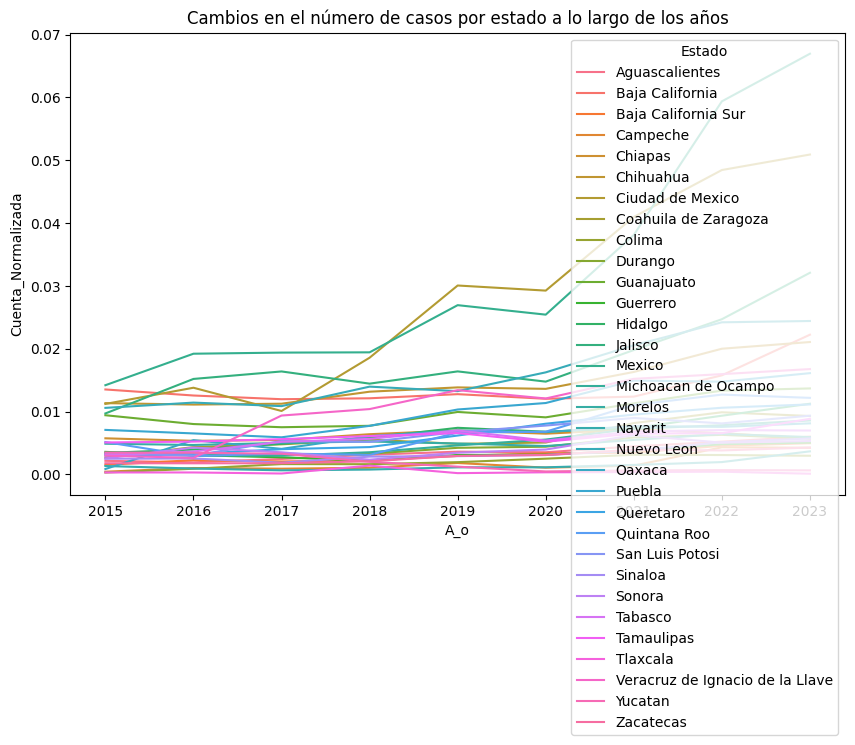

In [34]:
''' Ten cuidado en como tratas los datos, por que en esta seccion no se puede normalizar, dado que la seccion que debimos normalizar fue unicamente
la de este a;o aun que no lo se si contamos todos y normalizamos a la poblacion actual de cada uno de los estados pues es el valor que funciona para todos, creo...'''
# Agrupación por Año y Estado
df_agrupado = df_sex_agresion.groupby(['A_o', 'Estado'])['Cuenta_Normalizada'].sum().reset_index()

# Gráfico de líneas
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_agrupado, x='A_o', y='Cuenta_Normalizada', hue='Estado')
plt.title('Cambios en el número de casos por estado a lo largo de los años')
plt.show()

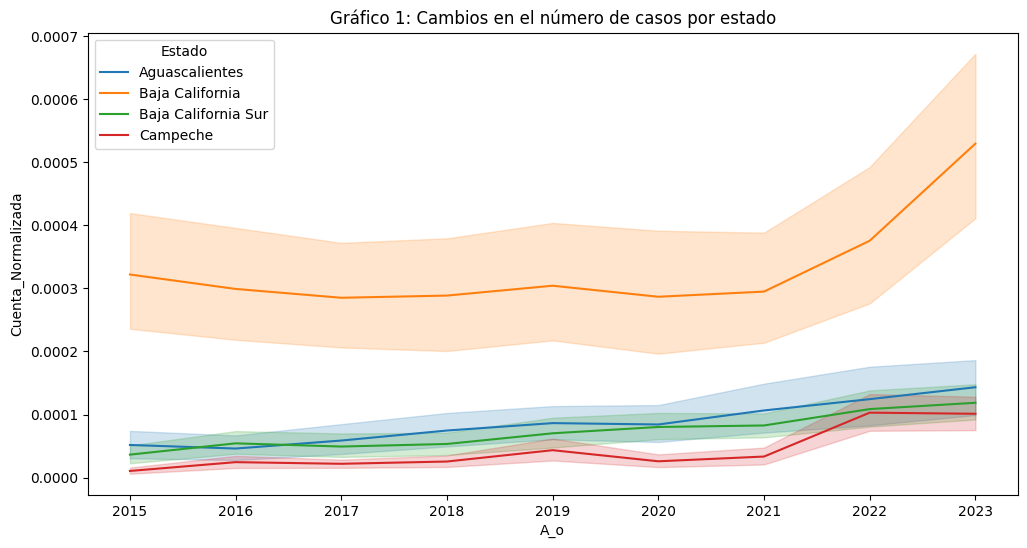

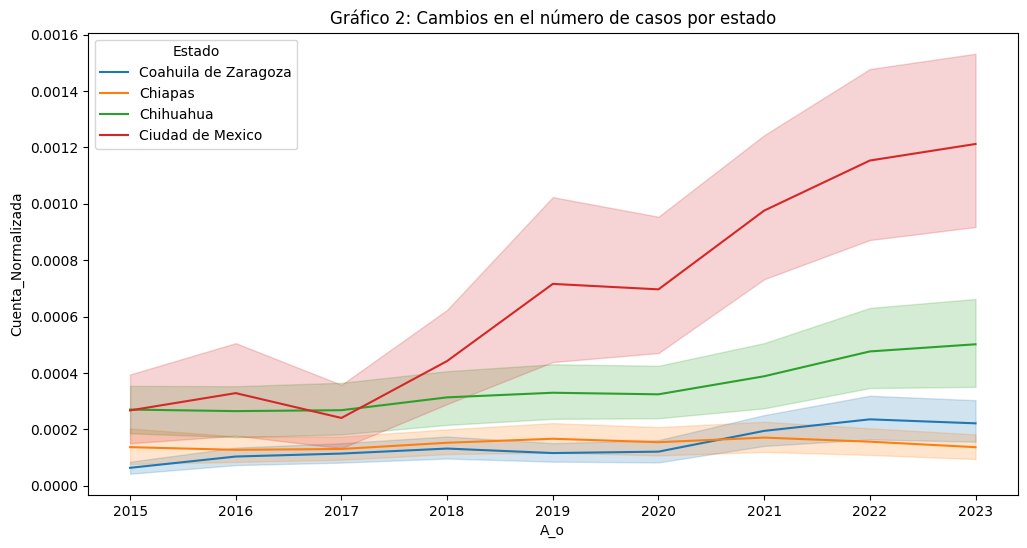

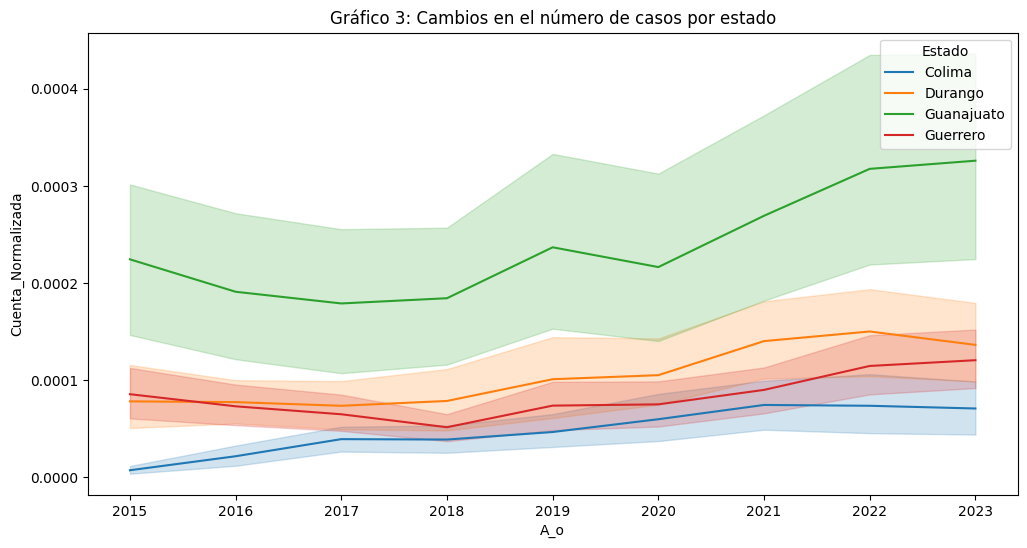

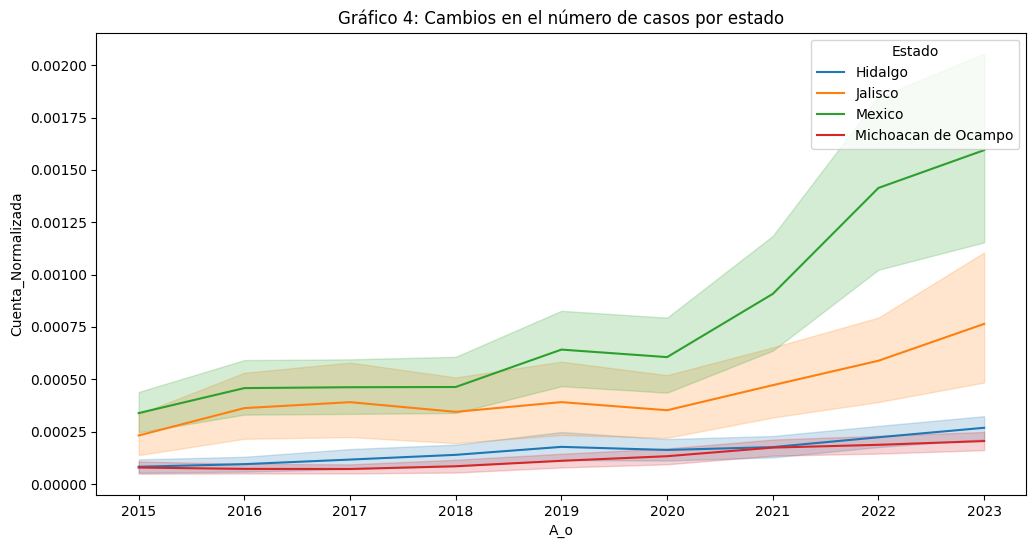

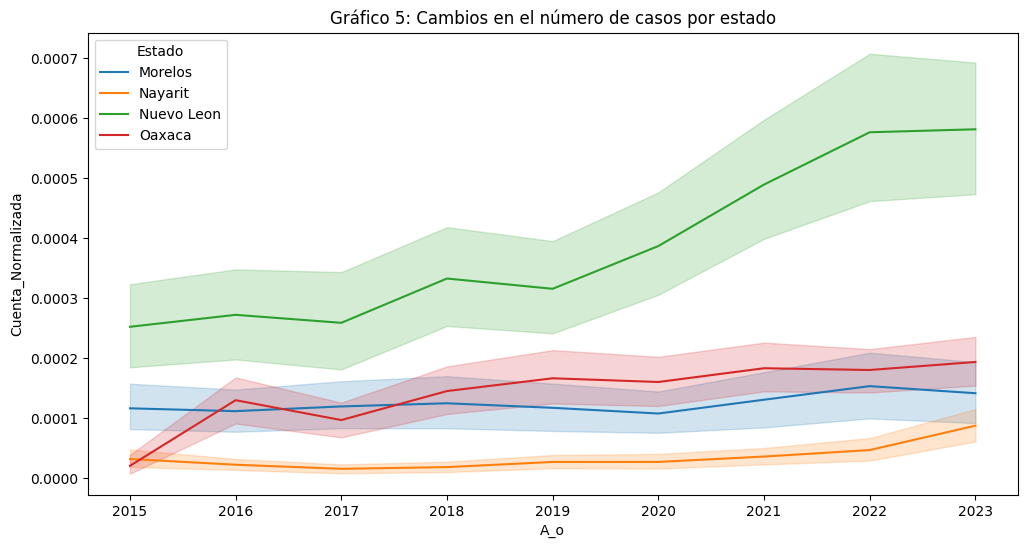

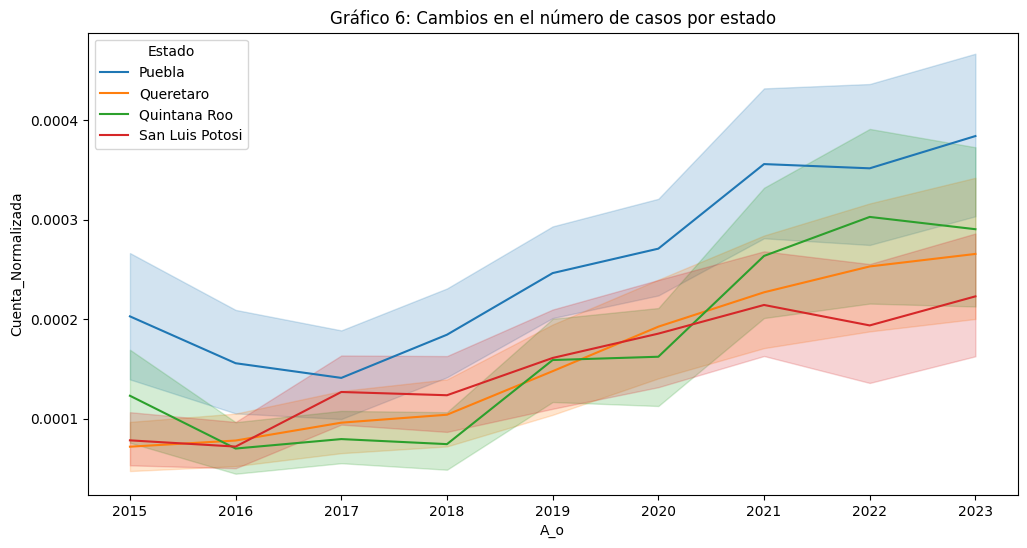

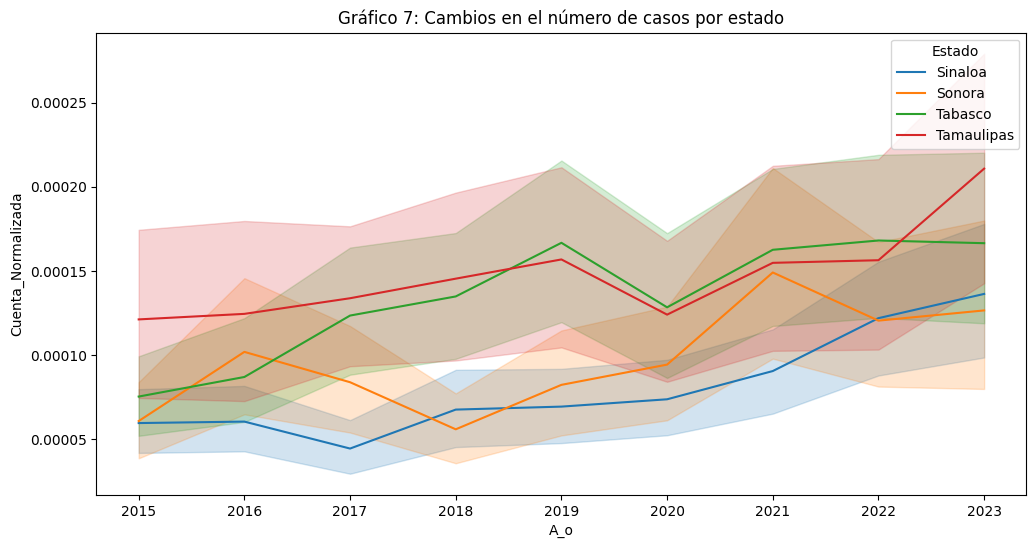

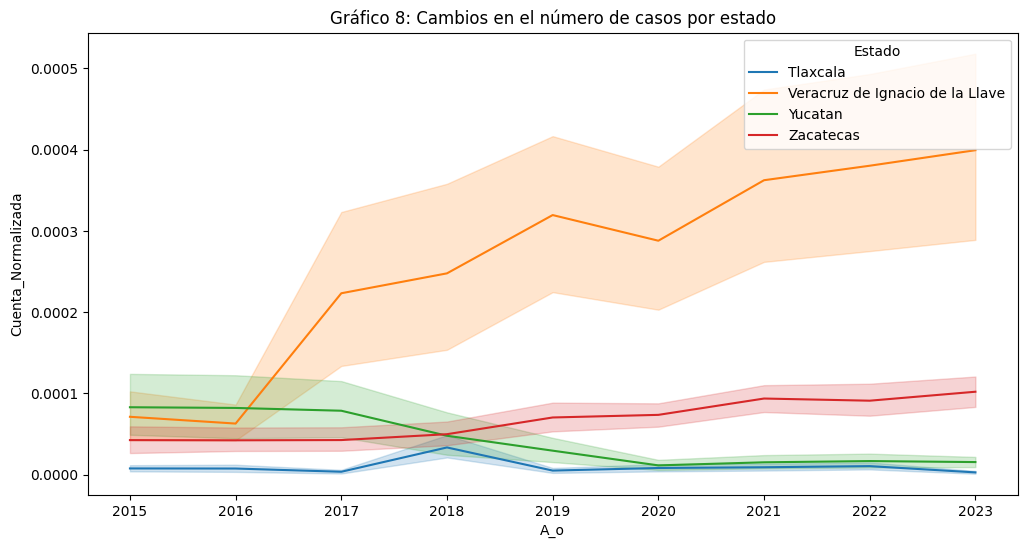

In [35]:
''' Los detalles es que hay mucha variabilidad en los estados, entonces como hago para jugar con un orden, o me refiero a los 10 primeros o dejo algunos de lado...'''


estados_unicos = df_agrupado['Estado'].unique()
#print(estados_unicos)


# division de los estados en n grupos para graficar
estados_divididos = [estados_unicos[i:i + 4] for i in range(0, len(estados_unicos), 4)]
#print(estados_divididos)

for i, estados_subconjunto in enumerate(estados_divididos):
    df_subconjunto = df_sex_agresion[df_sex_agresion['Estado'].isin(estados_subconjunto)]
    
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_subconjunto, x='A_o', y='Cuenta_Normalizada', hue='Estado')
    plt.title(f'Gráfico {i+1}: Cambios en el número de casos por estado')
    plt.show()



In [36]:
df_sex_agresion['Tipo_de_abuso'].unique()


array(['Acoso sexual', 'Hostigamiento sexual', 'Violacion simple',
       'Violacion Equiparada',
       'Otros delitos que atentan contra la libertad y la seguridad sexual',
       'Abuso sexual'], dtype=object)

In [37]:

cases_ac = sum(df_sex_agresion['Tipo_de_abuso'] == 'Acoso sexual')
cases_ab = sum(df_sex_agresion['Tipo_de_abuso'] == 'Abuso sexual')

print(cases_ab)
print(cases_ab)

2009
2009


In [38]:
Relacion_tipo_abuso = df_sex_agresion['Tipo_de_abuso'] == ''

In [39]:
df_sex_agresion.columns

Index(['A_o', 'Estado', 'Tipo_de_abuso', 'Subtipo_de_Abuso', 'Mes', 'Cuenta',
       'Cuenta_Normalizada'],
      dtype='object')

# Analisis Bi-Variable

###### Normalizacion datos

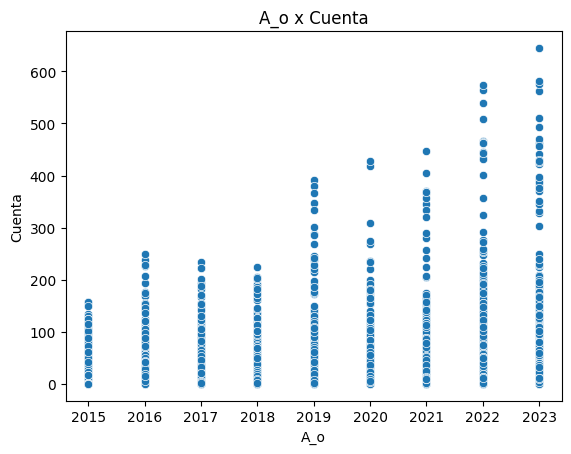

In [40]:
''' Dado que tenemos dos variables numericas empezare por ahi para ver como se relaciona el a;o con la cuenta'''

sns.scatterplot( x = 'A_o', y = 'Cuenta' , data= df_sex_agresion)
plt.title('A_o x Cuenta')
plt.show()

# NO ES UTIL EN REALIDAD, LOS DATOS ESTAN MUY SUPER PUESTOS

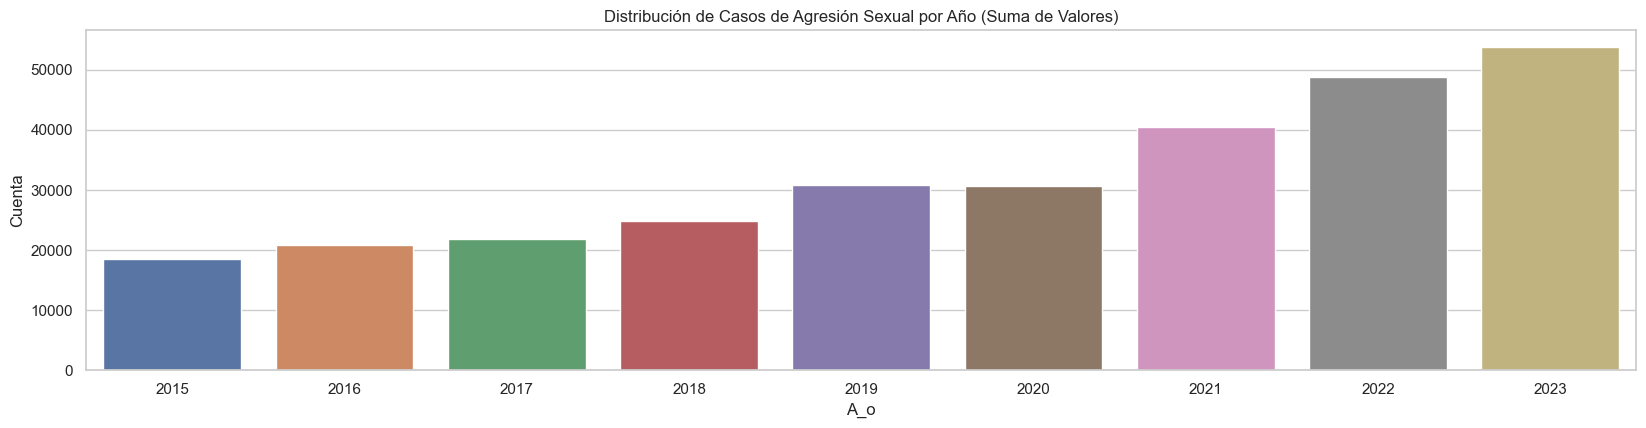

In [41]:
''' Cabe senalar que los datos no estan normalizados a el crecimiento de la poblacion, por lo cual no se puede saber
    si los casos estan disminuyendo o aumentando, necesitamos saber las cifras de la poblacion para poder hacer ese ajuste'''
    
    
# Configurar el estilo estético de las gráficas con Seaborn
sns.set_theme(style="whitegrid")

# Inicializar la figura donde se mostrarán las gráficas
# Establecemos el tamaño de la figura en 20x15
plt.figure(figsize=(20, 15))

# Crear un subplot para la primera gráfica
# El primer número '3' indica que habrá 3 filas de gráficos
# El segundo número '1' indica que habrá 1 columna de gráficos
# El tercer número '1' indica que este es el primer gráfico
plt.subplot(3, 1, 1)

# Crear un gráfico de barras para mostrar la distribución por año
# 'data=df' especifica el DataFrame que estamos usando
# 'x='A_o'' y 'y='Valor'' especifican las columnas del DataFrame que se usarán para el eje x e y, respectivamente
# 'estimator=sum' indica que queremos sumar los valores para cada categoría, en lugar de contarlos
# 'ci=None' elimina el intervalo de confianza que Seaborn muestra por defecto
sns.barplot(data=df_sex_agresion, x='A_o', y='Cuenta', estimator=sum, errorbar=None)

# Añadir un título a la gráfica
plt.title('Distribución de Casos de Agresión Sexual por Año (Suma de Valores)')

plt.show()

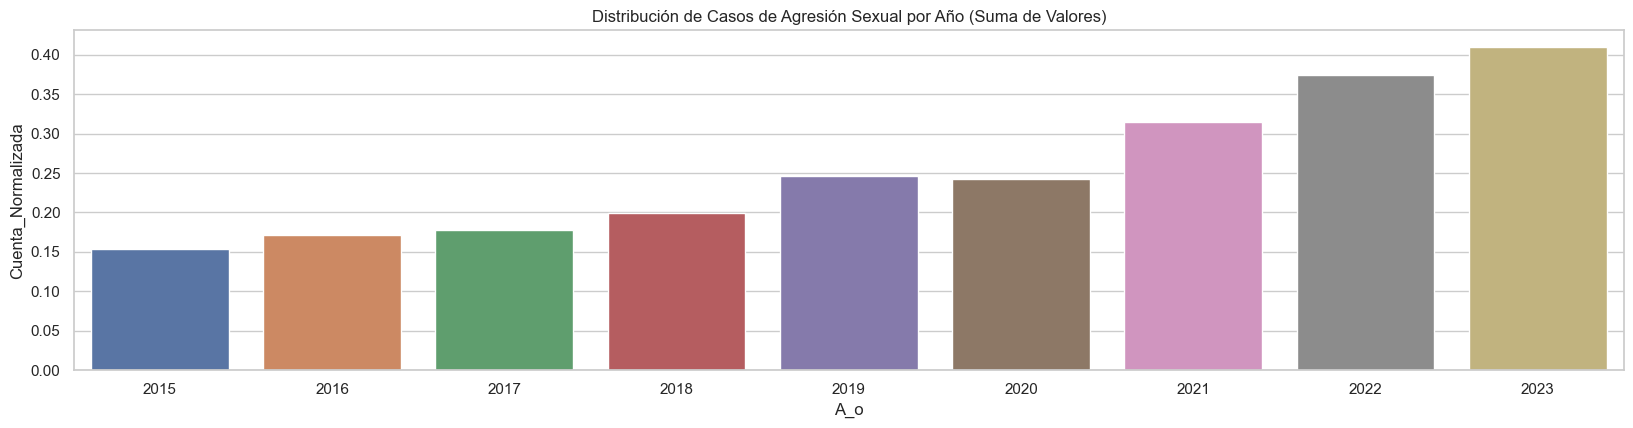

In [42]:
# Configurar el estilo estético de las gráficas con Seaborn
sns.set_theme(style="whitegrid")

# Inicializar la figura donde se mostrarán las gráficas
# Establecemos el tamaño de la figura en 20x15
plt.figure(figsize=(20, 15))

# Crear un subplot para la primera gráfica
# El primer número '3' indica que habrá 3 filas de gráficos
# El segundo número '1' indica que habrá 1 columna de gráficos
# El tercer número '1' indica que este es el primer gráfico
plt.subplot(3, 1, 1)

# Crear un gráfico de barras para mostrar la distribución por año
# 'data=df' especifica el DataFrame que estamos usando
# 'x='A_o'' y 'y='Valor'' especifican las columnas del DataFrame que se usarán para el eje x e y, respectivamente
# 'estimator=sum' indica que queremos sumar los valores para cada categoría, en lugar de contarlos
# 'ci=None' elimina el intervalo de confianza que Seaborn muestra por defecto
sns.barplot(data=df_sex_agresion, x='A_o', y='Cuenta_Normalizada', estimator=sum, errorbar=None)

# Añadir un título a la gráfica
plt.title('Distribución de Casos de Agresión Sexual por Año (Suma de Valores)')

plt.show()

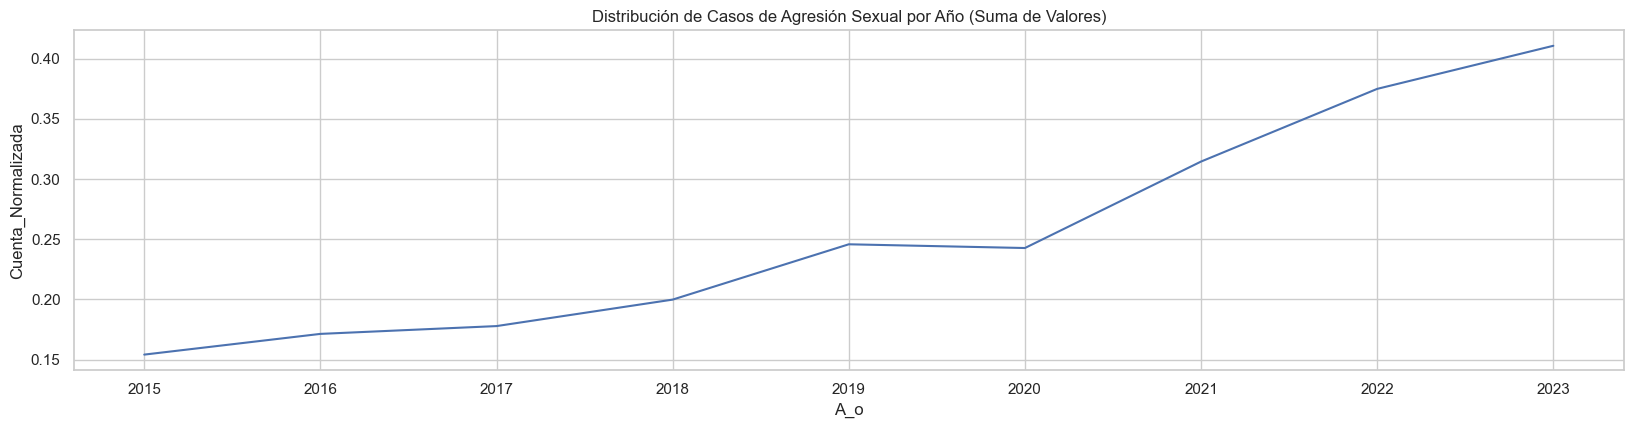

In [43]:
# Mantenemos el estilo y la figura como en tu código original
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20, 15))

# Usamos lineplot en lugar de barplot
plt.subplot(3, 1, 1)
sns.lineplot(data=df_sex_agresion, x='A_o', y='Cuenta_Normalizada', estimator=sum, err_style=None)

# Título
plt.title('Distribución de Casos de Agresión Sexual por Año (Suma de Valores)')

plt.show()

##

###### 

In [44]:
''' Despues de normalizar podemos ver que en el 19 - 20, se redujo casi nada, entonces en otras palabras a estado creciendo con datos ya normalizados'''

' Despues de normalizar podemos ver que en el 19 - 20, se redujo casi nada, entonces en otras palabras a estado creciendo con datos ya normalizados'

###### Analisis Bi Variable Estado_ Cuenta normalizada

Text(0.5, 1.0, 'Distribución de Casos de Agresión Sexual por Estado (Normalizacion de Valores)')

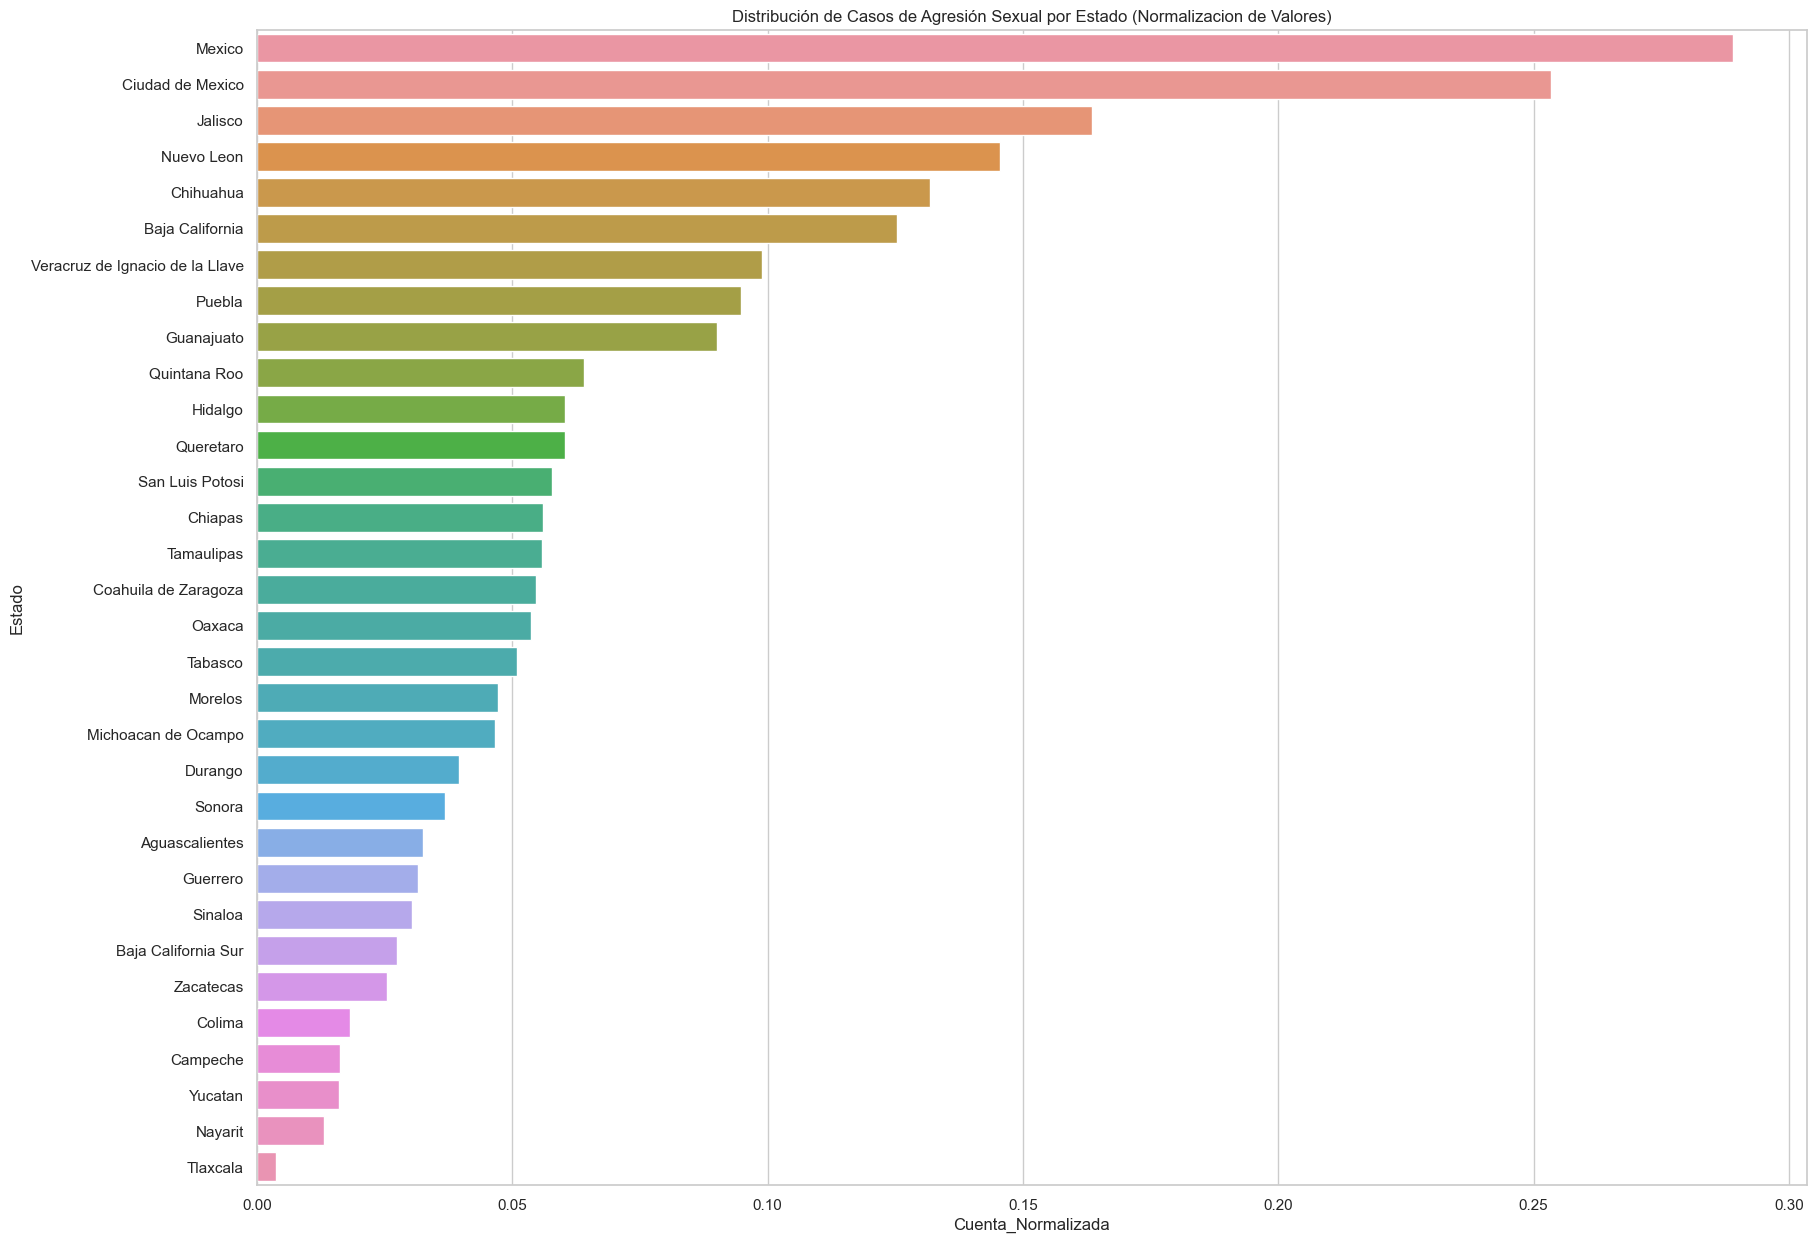

In [45]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20, 15))
sns.barplot(data=df_sex_agresion, y ='Estado', x ='Cuenta_Normalizada', estimator=sum, errorbar=None, order = df_sex_agresion.groupby('Estado')['Cuenta_Normalizada'].sum().sort_values(ascending=False).index)
#sns.barplot(data=df_sex_agreson, y='Estado', x='Valor', estimator=sum, ci= None, order = df_sex_agreson.groupby('Estado')['Valor'].sum().sort_values(ascending=False).index)
# Añadir un título a la gráfica
plt.title('Distribución de Casos de Agresión Sexual por Estado (Normalizacion de Valores)')

# plt.show()df_sex_agresion.groupby('Estado'): Aquí, el DataFrame se agrupa por la columna Estado. Esto crea un nuevo objeto de grupo donde los datos están agrupados según los distintos estados.

# ['Cuenta_Normalizada']: Después de agrupar, seleccionamos la columna Cuenta_Normalizada para realizar operaciones adicionales en ella.

# .sum(): Suma los valores de Cuenta_Normalizada para cada estado. Esto te da una suma total de Cuenta_Normalizada por estado.

# .sort_values(ascending=False): Ordena los valores sumados de forma descendente. Así, el estado con la mayor suma de Cuenta_Normalizada estará primero.

# .index: Finalmente, toma los índices de estos valores ordenados (que son los nombres de los estados) y los usa para el parámetro order.

# 🔄 Cómo Itera
# Primero, groupby agrupa todas las filas que tienen el mismo estado.
# Luego, para cada grupo, se suman los valores en la columna Cuenta_Normalizada.
# Estos valores sumados se ordenan de mayor a menor.
# Los índices (nombres de los estados) de estos valores ordenados se extraen y se usan para determinar el orden en que se mostrarán las barras en el gráfico.
#los indices son los estados, por asi decirlos, ordenados

In [46]:
''' Antes de la pandemia, parecia haber establecido un ritmo y pensariamos que la curva comenzaria a aplanarce, pero parece que el resentimiento
    o algo en la pandemia, hubo mas casos, pero no creo que esto sea solo culpa de la pandemia, debe haber mas
'''

' Antes de la pandemia, parecia haber establecido un ritmo y pensariamos que la curva comenzaria a aplanarce, pero parece que el resentimiento\n    o algo en la pandemia, hubo mas casos, pero no creo que esto sea solo culpa de la pandemia, debe haber mas\n'

In [47]:
df_sex_agresion.columns

Index(['A_o', 'Estado', 'Tipo_de_abuso', 'Subtipo_de_Abuso', 'Mes', 'Cuenta',
       'Cuenta_Normalizada'],
      dtype='object')

Text(0.5, 1.0, 'Distribución de Casos de Agresión Sexual por Tipo_de_abuso (Normalizacion de Valores)')

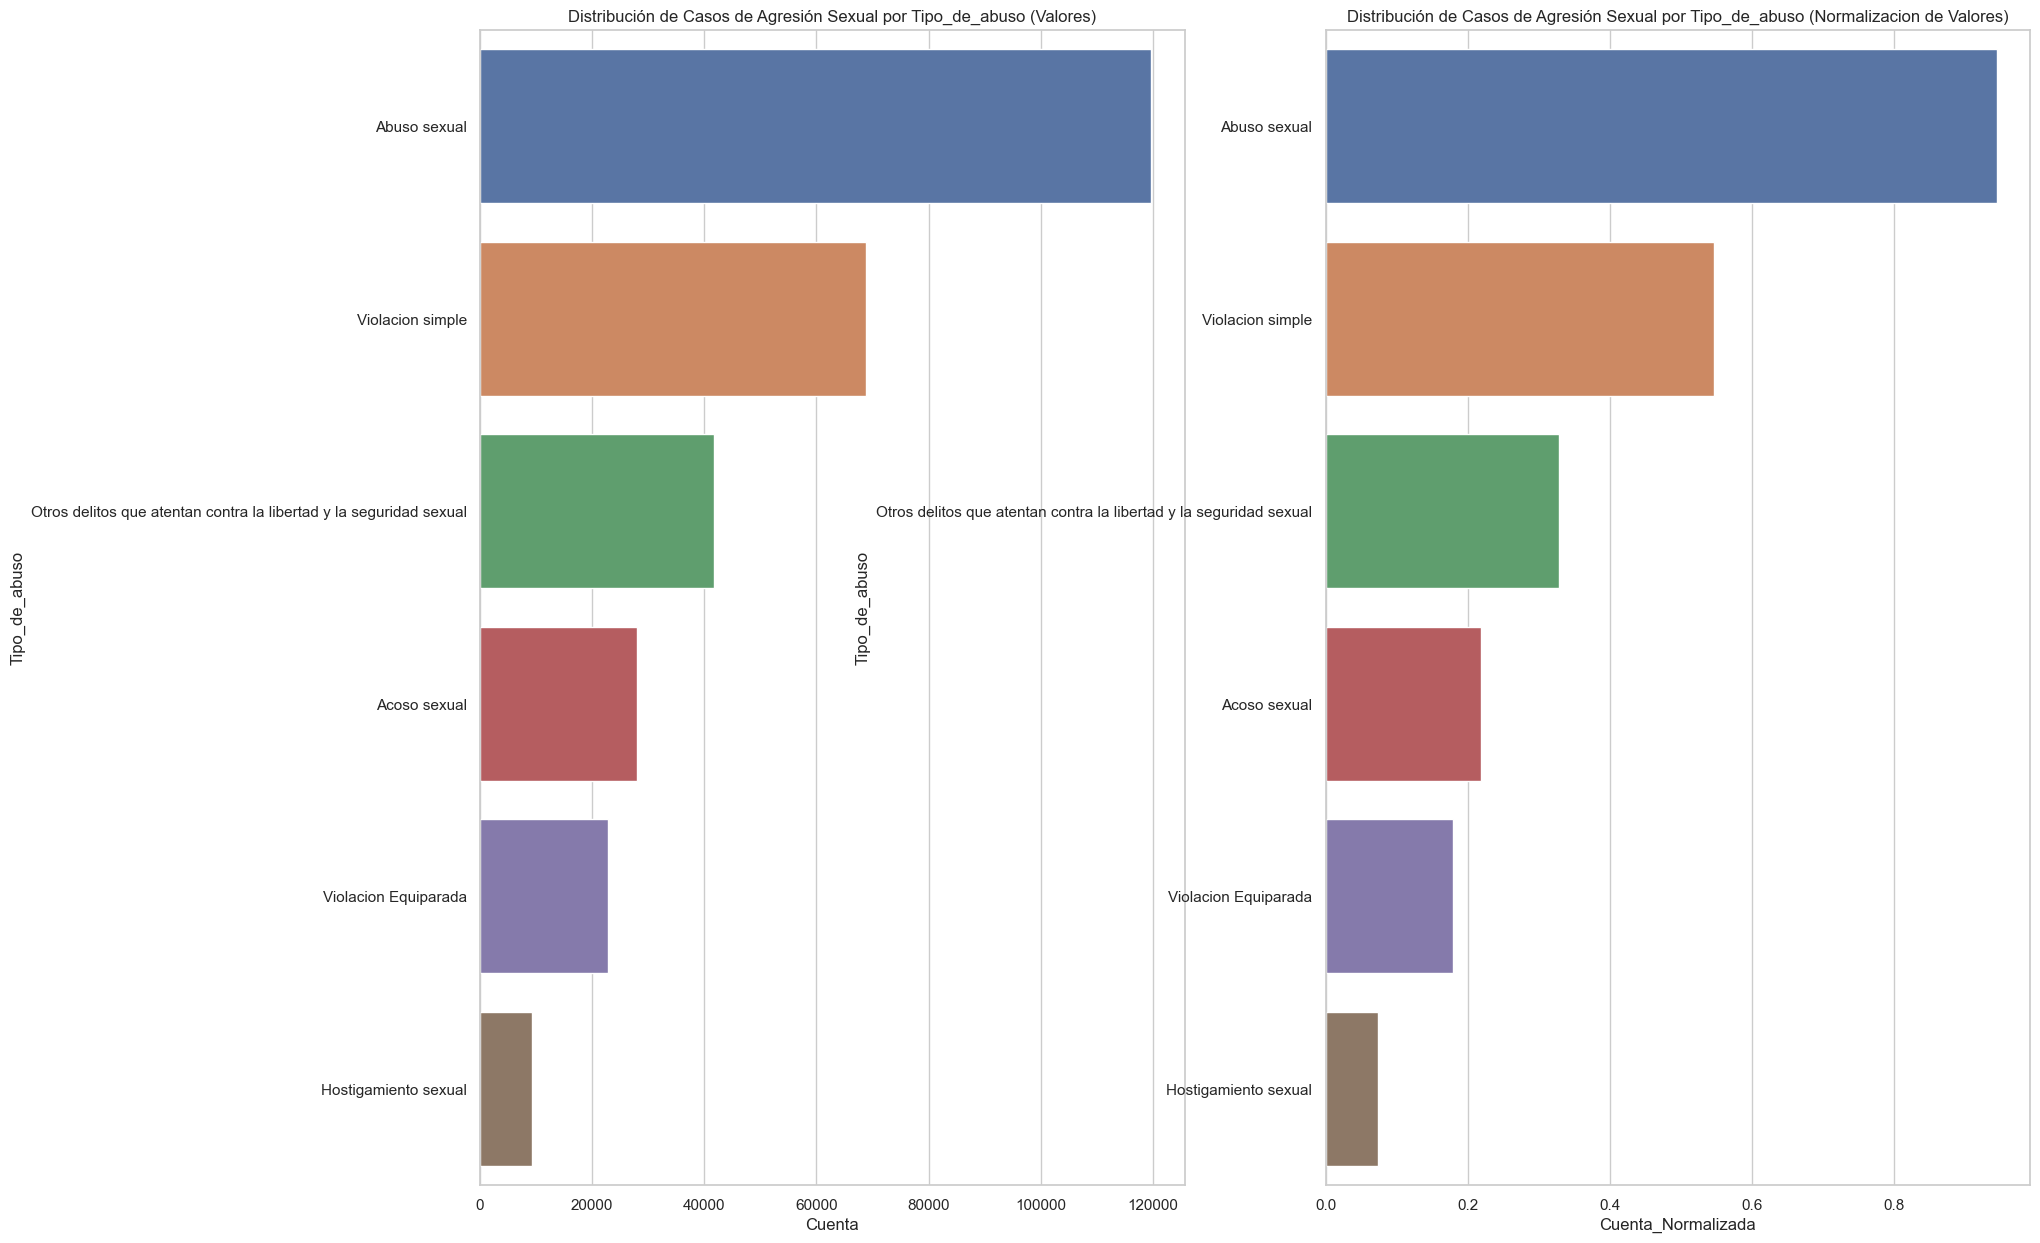

In [48]:
sns.set_theme(style='whitegrid') # Podriamos ver otros disenos a ver cual nos parece mas amigable / o el que simplemente nos guste mas

plt.figure(figsize=(20, 15))
plt.subplot(1,2,1)
sns.barplot(data=df_sex_agresion, y ='Tipo_de_abuso', x ='Cuenta', estimator=sum, errorbar=None, order = df_sex_agresion.groupby('Tipo_de_abuso')['Cuenta_Normalizada'].sum().sort_values(ascending=False).index)
plt.title('Distribución de Casos de Agresión Sexual por Tipo_de_abuso (Valores)')

plt.subplot(1,2,2)
sns.barplot(data=df_sex_agresion, y ='Tipo_de_abuso', x ='Cuenta_Normalizada' , estimator=sum, errorbar=None, order = df_sex_agresion.groupby('Tipo_de_abuso')['Cuenta_Normalizada'].sum().sort_values(ascending=False).index)
plt.title('Distribución de Casos de Agresión Sexual por Tipo_de_abuso (Normalizacion de Valores)')


In [49]:
#df_sex_agresion.describe()
df_sex_agresion.info()

df_sex_agresion[['Estado']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12089 entries, 0 to 12088
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   A_o                 12089 non-null  int64  
 1   Estado              12089 non-null  object 
 2   Tipo_de_abuso       12089 non-null  object 
 3   Subtipo_de_Abuso    12089 non-null  object 
 4   Mes                 12089 non-null  object 
 5   Cuenta              12089 non-null  int64  
 6   Cuenta_Normalizada  12089 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 661.2+ KB


,Estado
0,Puebla
1,Puebla
2,Puebla
3,Puebla
4,Puebla
...,...
12084,Oaxaca
12085,Oaxaca
12086,Oaxaca
12087,Oaxaca


# USO DE SMALL MULTIPLES 

c:\Users\Edgar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25308\1509181526.py:22: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


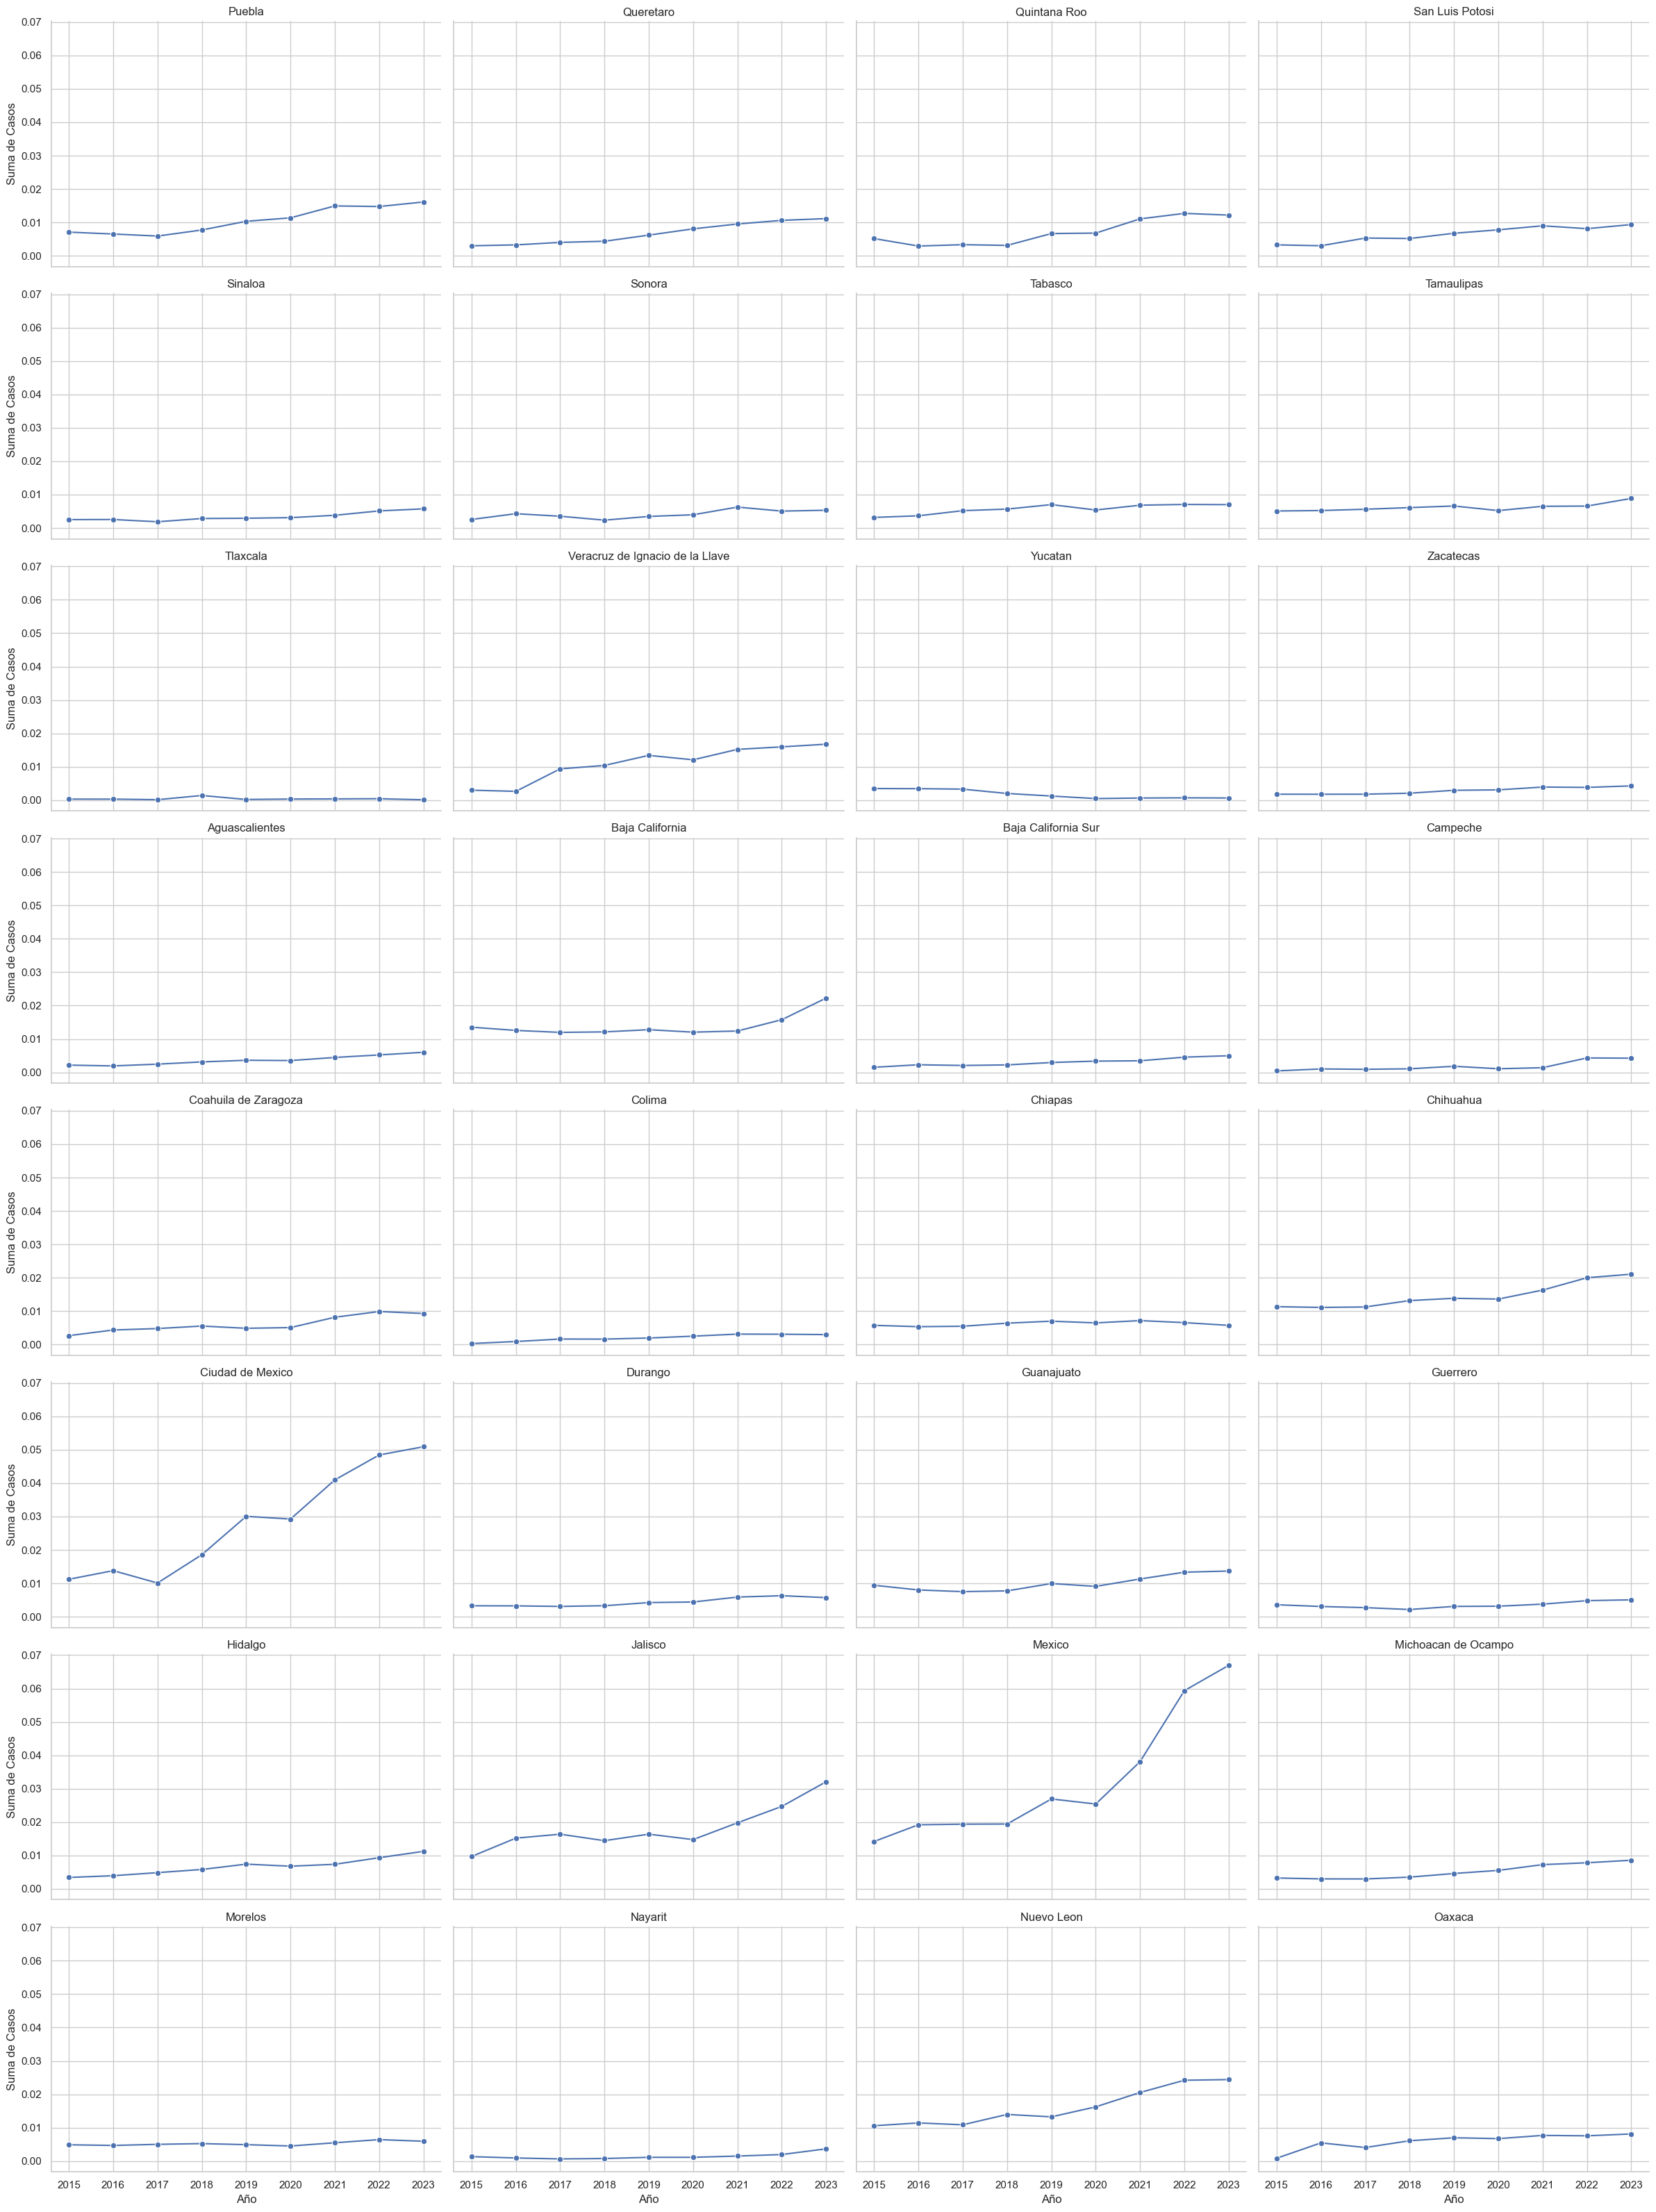

' Revisar cambios o contra parte con la cuenta normal / no la normalizada'

In [50]:
# Inicializar un FacetGrid para crear "small multiples"
# Aquí, col="Estado" significa que queremos un subgráfico para cada estado único
# col_wrap=4 significa que queremos 4 subgráficos por fila
# height=4 y aspect=1.5 definen el tamaño y la forma de cada subgráfico
g = sns.FacetGrid(df_sex_agresion, col="Estado", col_wrap=4, height=4, aspect=1.5)

# Mapear un gráfico de líneas en cada FacetGrid
# Utilizamos sns.lineplot para dibujar el gráfico de líneas en cada subgráfico
# "A_o" es el eje x y "Valor" es el eje y
# estimator = sum significa que estamos sumando todos los valores para cada año (en lugar de, por ejemplo, calcular un promedio)
# errorbar = None significa que no queremos mostrar el intervalo de confianza alrededor de la línea de tendencia
# marker ....?
g.map(sns.lineplot, "A_o", "Cuenta_Normalizada", estimator=sum, errorbar=None, marker='o')

# Añadir etiquetas a los ejes y títulos a los subgráficos
# set_axis_labels nos permite etiquetar los ejes x e y
# set_titles añade un título a cada subgráfico basado en el valor de la columna "Estado"
g.set_axis_labels("Año", "Suma de Casos")
g.set_titles("{col_name}")

# Mostrar el gráfico ajustando el diseño para que todo encaje bien
plt.tight_layout()
plt.show()


''' Revisar cambios o contra parte con la cuenta normal / no la normalizada'''

In [51]:
df_sex_agresion['Tipo_de_abuso'].unique()

array(['Acoso sexual', 'Hostigamiento sexual', 'Violacion simple',
       'Violacion Equiparada',
       'Otros delitos que atentan contra la libertad y la seguridad sexual',
       'Abuso sexual'], dtype=object)

c:\Users\Edgar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25308\3534257950.py:28: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


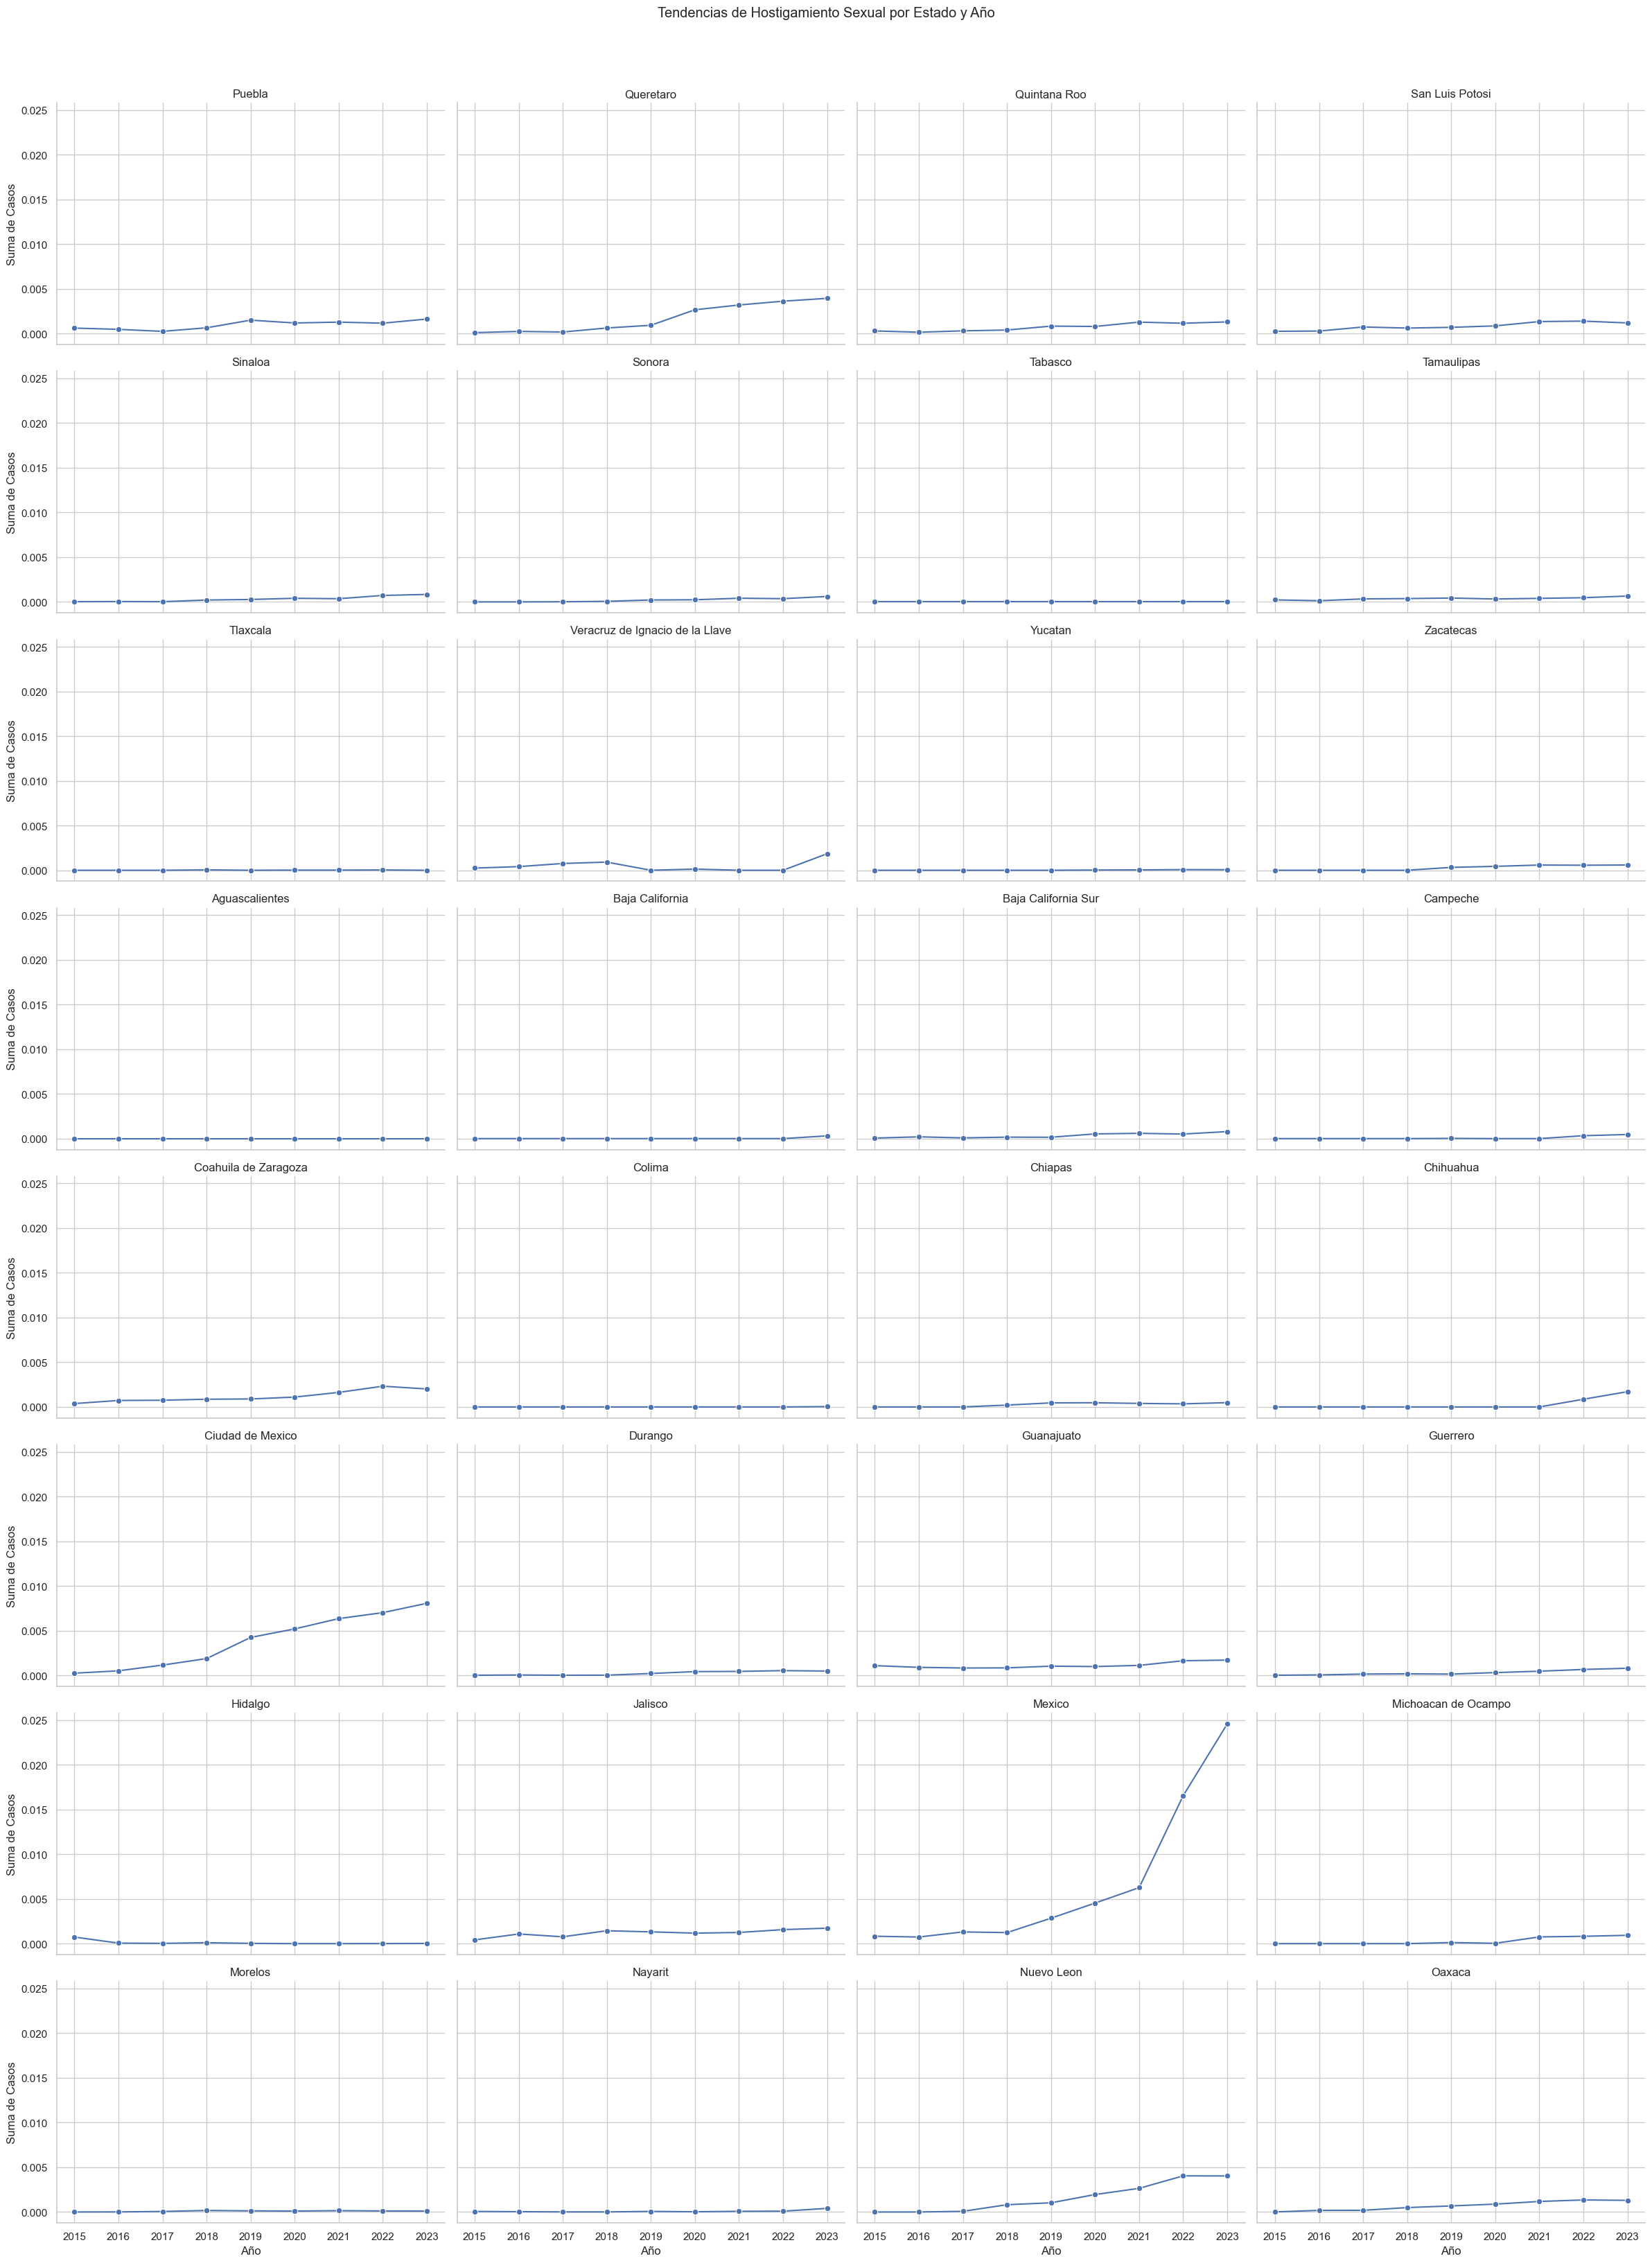

In [52]:
# Filter the data to focus only on "Hostigamiento sexual"
df_hostigamiento_sexual = df_sex_agresion[df_sex_agresion['Tipo_de_abuso'] == 'Acoso sexual']
# Inicializar un FacetGrid para crear "small multiples" (múltiples subgráficos).
# El argumento 'col' indica que queremos un subgráfico por cada estado.
# 'col_wrap=4' establece que habrá 4 subgráficos por fila.
# 'height=4' y 'aspect=1.5' controlan el tamaño de cada subgráfico.
g = sns.FacetGrid(df_hostigamiento_sexual, col="Estado", col_wrap=4, height=4, aspect=1.5)

# Mapear un gráfico de líneas en cada FacetGrid.
# El primer argumento indica el eje x ("A_o" para año), y el segundo es el eje y ("Valor").
# 'estimator=sum' suma todos los valores para cada año.
# 'ci=None' desactiva el intervalo de confianza alrededor de la línea.
# 'marker='o'' usa círculos como marcadores en la línea.
g.map(sns.lineplot, "A_o", "Cuenta_Normalizada", estimator=sum, errorbar=None, marker='o')

# Añadir títulos y etiquetas a los ejes.
# 'set_axis_labels' añade etiquetas a los ejes x e y.
# 'set_titles' añade un título a cada subgráfico, usando el nombre del estado.
g.set_axis_labels("Año", "Suma de Casos")
g.set_titles("{col_name}")

# Añadir un título general a toda la figura
g.fig.suptitle('Tendencias de Hostigamiento Sexual por Estado y Año', y=1.02)


# Mostrar el gráfico.
# 'tight_layout()' ajusta automáticamente los subgráficos para que no se superpongan.
plt.tight_layout()
plt.show()

In [53]:
df_sex_agresion['Tipo_de_abuso'].unique()

array(['Acoso sexual', 'Hostigamiento sexual', 'Violacion simple',
       'Violacion Equiparada',
       'Otros delitos que atentan contra la libertad y la seguridad sexual',
       'Abuso sexual'], dtype=object)

c:\Users\Edgar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25308\3903199610.py:28: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


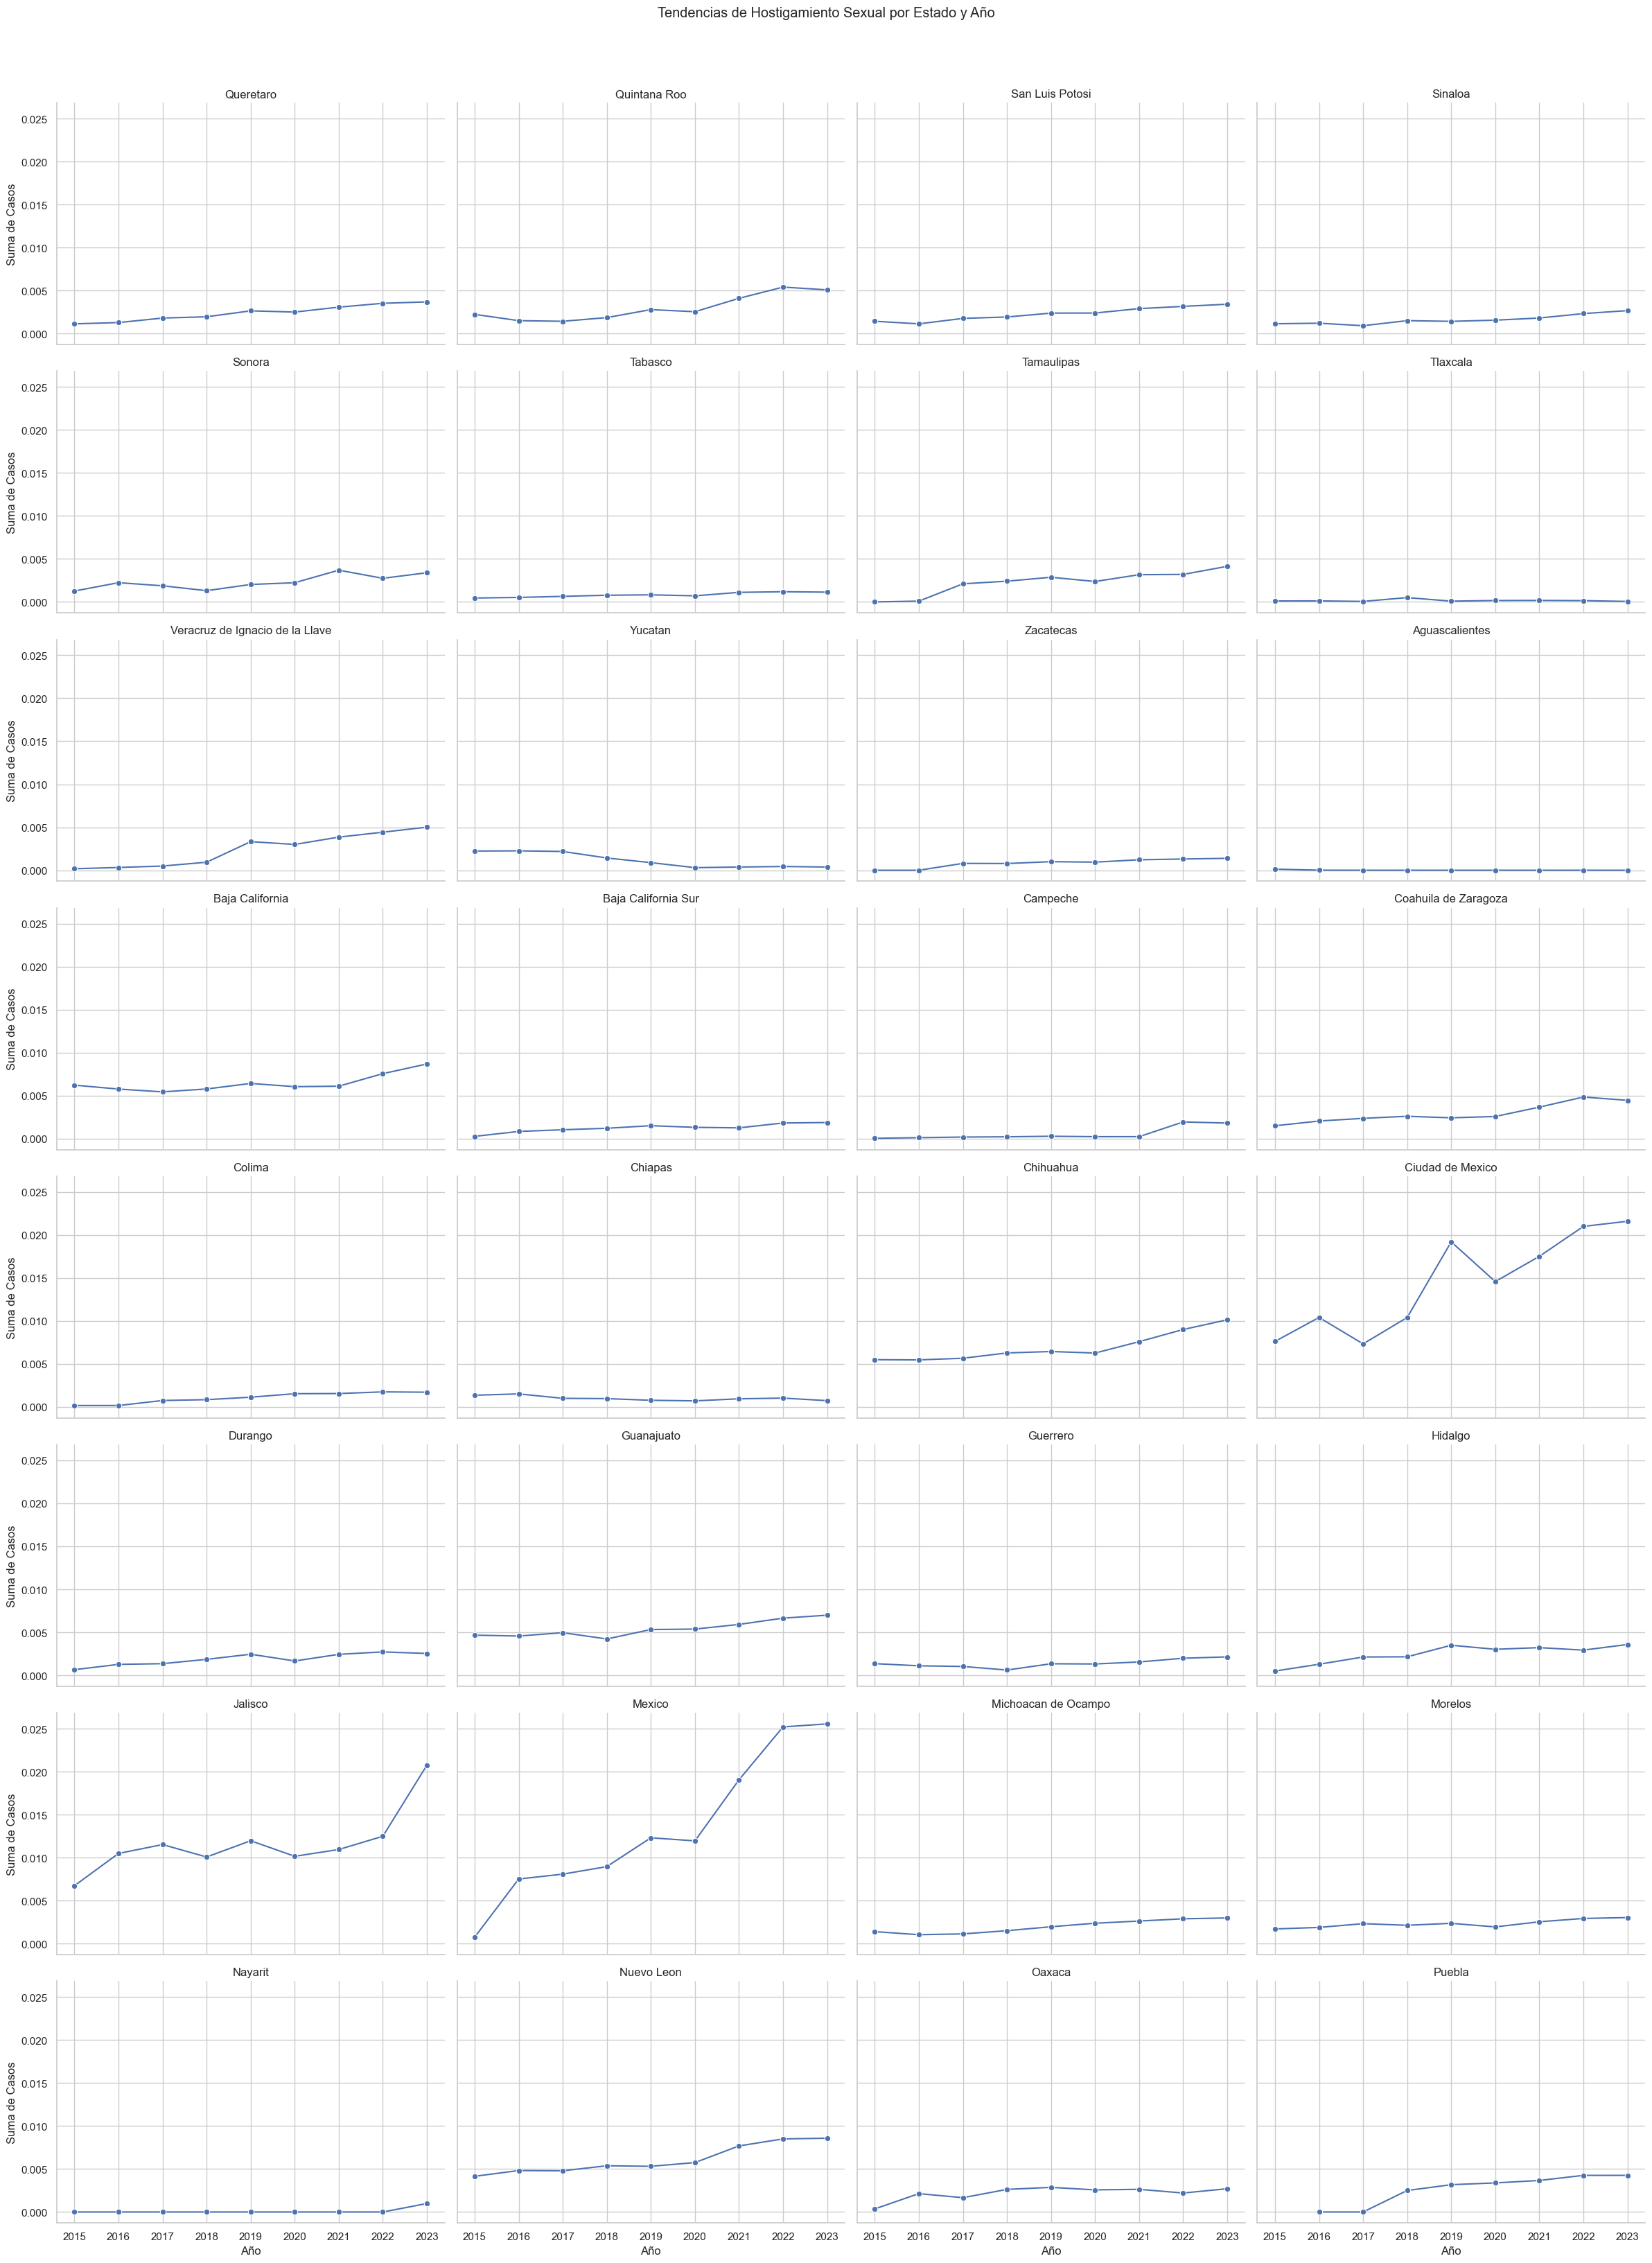

In [54]:
# Filter the data to focus only on "Hostigamiento sexual"
df_hostigamiento_sexual = df_sex_agresion[df_sex_agresion['Tipo_de_abuso'] == 'Abuso sexual']
# Inicializar un FacetGrid para crear "small multiples" (múltiples subgráficos).
# El argumento 'col' indica que queremos un subgráfico por cada estado.
# 'col_wrap=4' establece que habrá 4 subgráficos por fila.
# 'height=4' y 'aspect=1.5' controlan el tamaño de cada subgráfico.
g = sns.FacetGrid(df_hostigamiento_sexual, col="Estado", col_wrap=4, height=4, aspect=1.5)

# Mapear un gráfico de líneas en cada FacetGrid.
# El primer argumento indica el eje x ("A_o" para año), y el segundo es el eje y ("Valor").
# 'estimator=sum' suma todos los valores para cada año.
# 'ci=None' desactiva el intervalo de confianza alrededor de la línea.
# 'marker='o'' usa círculos como marcadores en la línea.
g.map(sns.lineplot, "A_o", "Cuenta_Normalizada", estimator=sum, errorbar=None, marker='o')

# Añadir títulos y etiquetas a los ejes.
# 'set_axis_labels' añade etiquetas a los ejes x e y.
# 'set_titles' añade un título a cada subgráfico, usando el nombre del estado.
g.set_axis_labels("Año", "Suma de Casos")
g.set_titles("{col_name}")

# Añadir un título general a toda la figura
g.fig.suptitle('Tendencias de Hostigamiento Sexual por Estado y Año', y=1.02)


# Mostrar el gráfico.
# 'tight_layout()' ajusta automáticamente los subgráficos para que no se superpongan.
plt.tight_layout()
plt.show()

c:\Users\Edgar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25308\2372841958.py:28: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


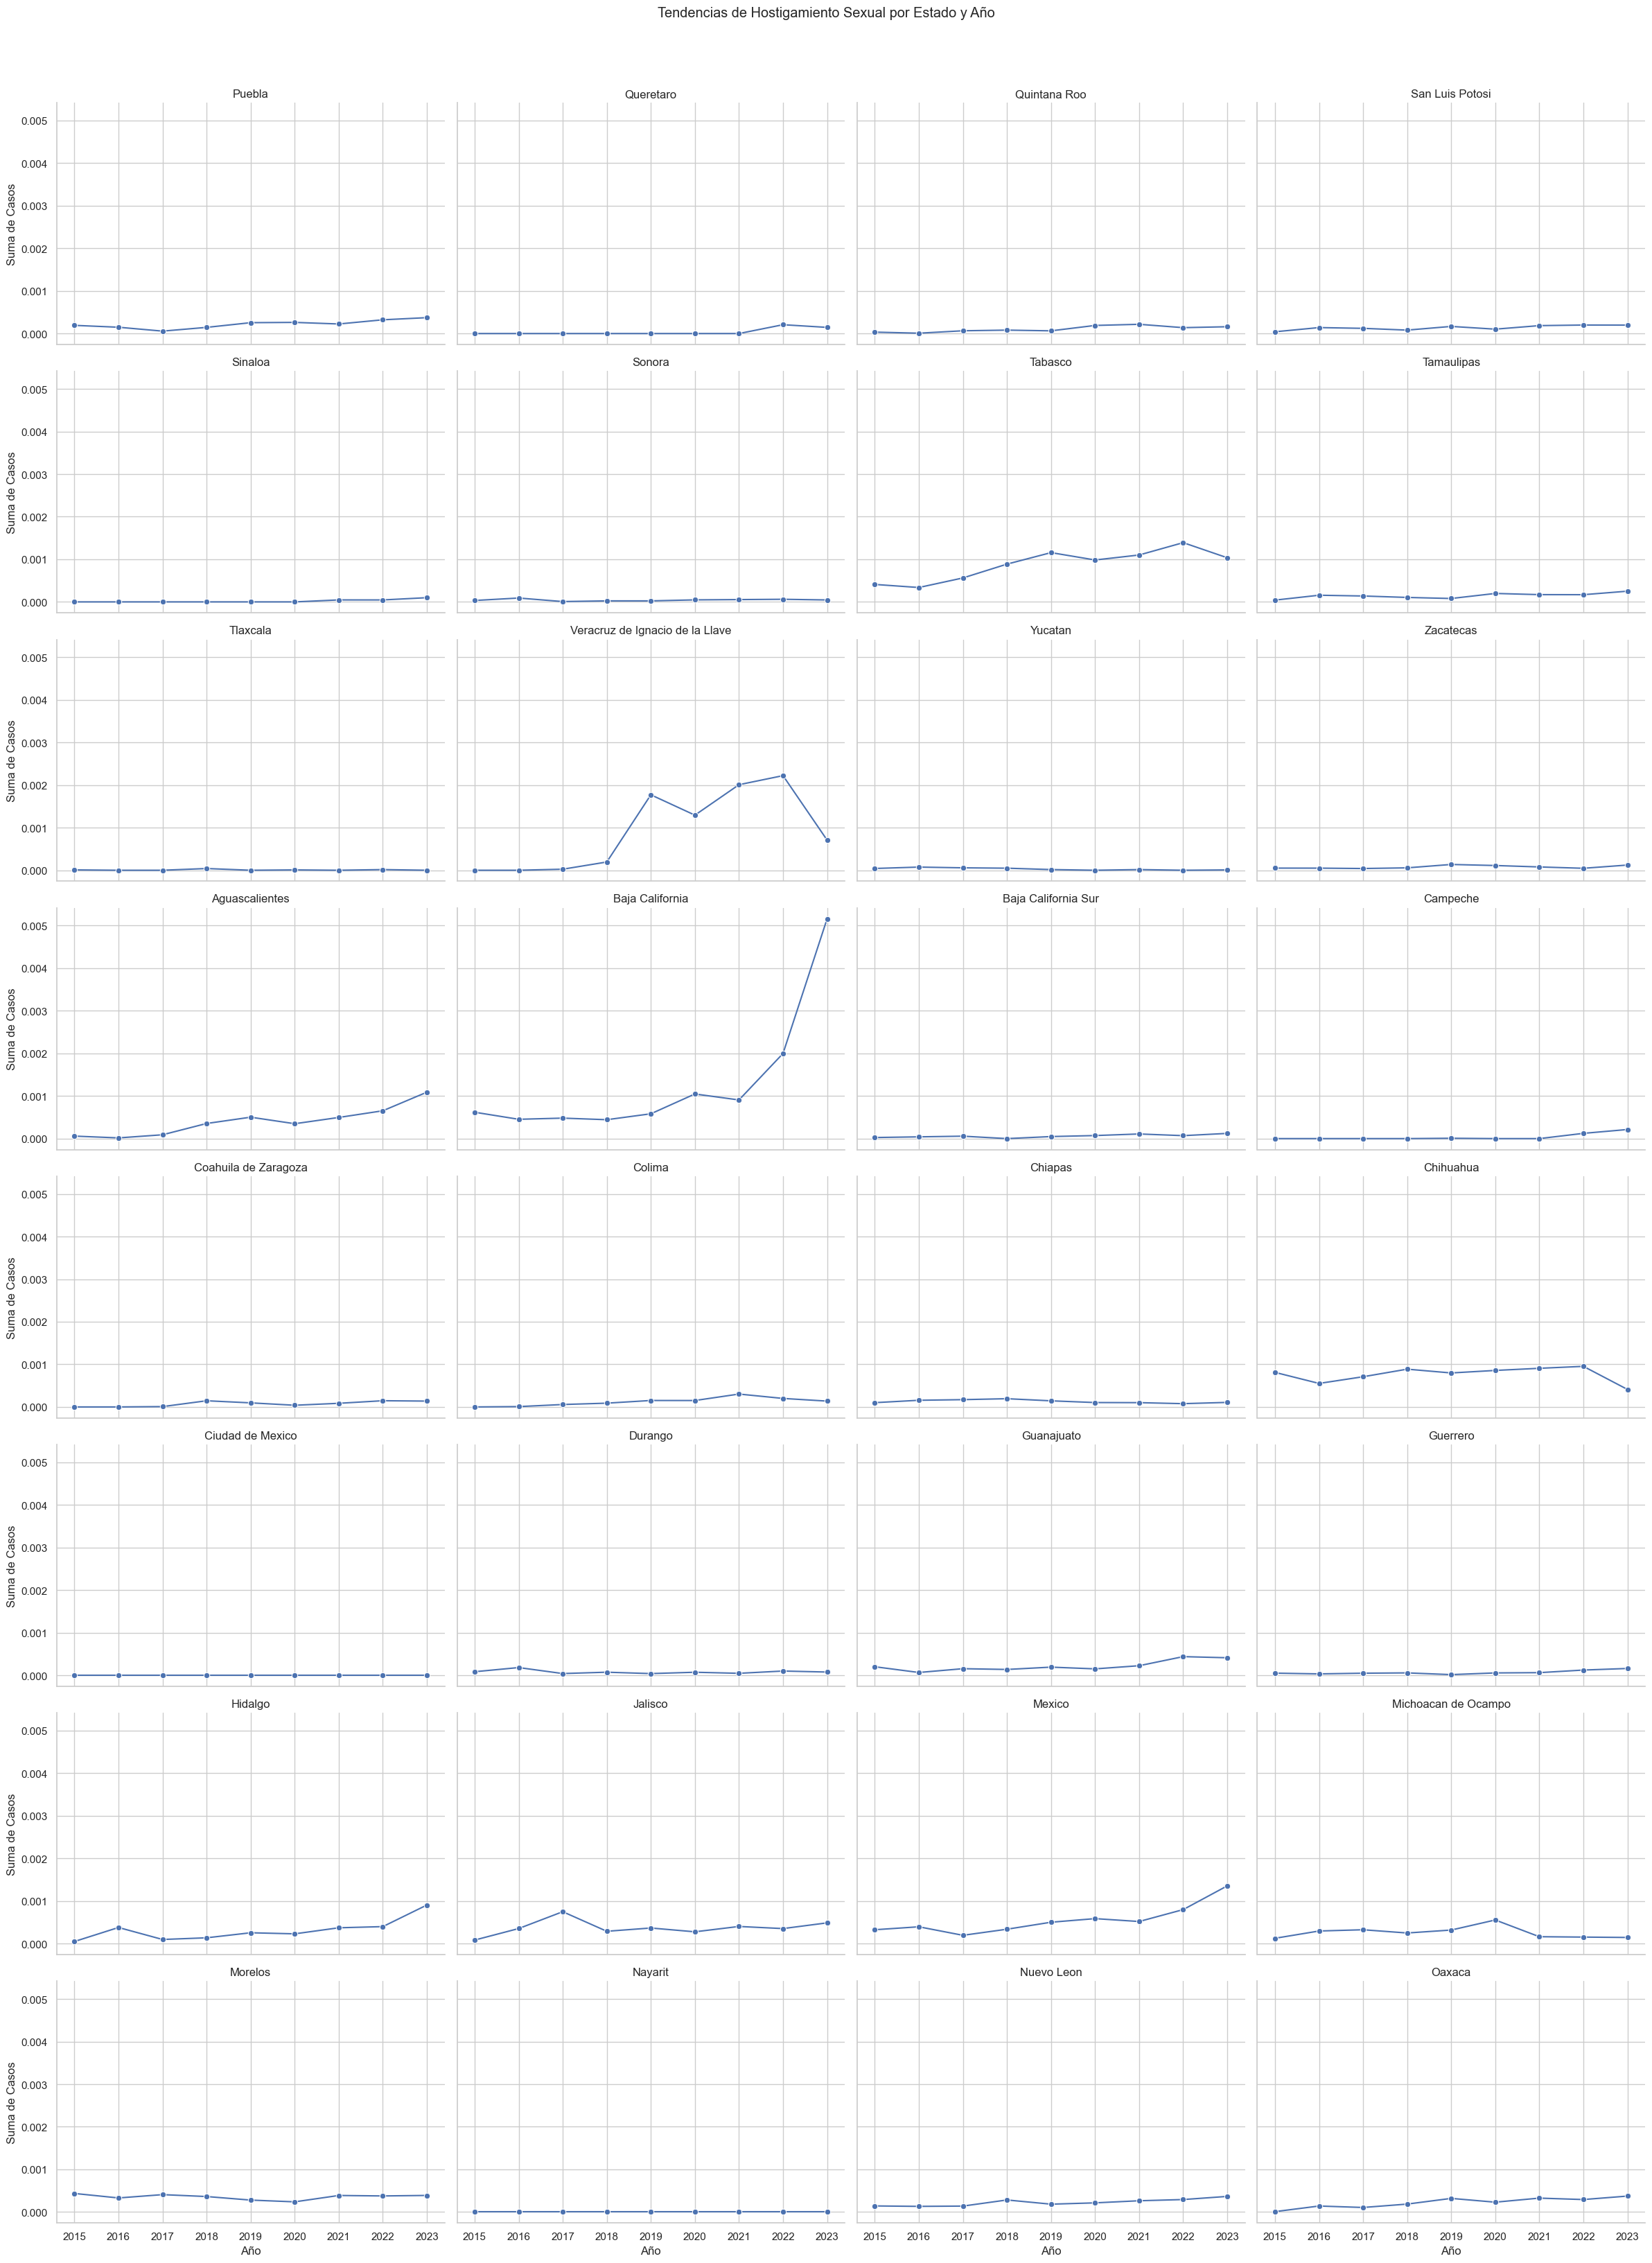

In [55]:
# Filter the data to focus only on "Hostigamiento sexual"
df_hostigamiento_sexual = df_sex_agresion[df_sex_agresion['Tipo_de_abuso'] == 'Hostigamiento sexual']
# Inicializar un FacetGrid para crear "small multiples" (múltiples subgráficos).
# El argumento 'col' indica que queremos un subgráfico por cada estado.
# 'col_wrap=4' establece que habrá 4 subgráficos por fila.
# 'height=4' y 'aspect=1.5' controlan el tamaño de cada subgráfico.
g = sns.FacetGrid(df_hostigamiento_sexual, col="Estado", col_wrap=4, height=4, aspect=1.5)

# Mapear un gráfico de líneas en cada FacetGrid.
# El primer argumento indica el eje x ("A_o" para año), y el segundo es el eje y ("Valor").
# 'estimator=sum' suma todos los valores para cada año.
# 'ci=None' desactiva el intervalo de confianza alrededor de la línea.
# 'marker='o'' usa círculos como marcadores en la línea.
g.map(sns.lineplot, "A_o", "Cuenta_Normalizada", estimator=sum, errorbar=None, marker='o')

# Añadir títulos y etiquetas a los ejes.
# 'set_axis_labels' añade etiquetas a los ejes x e y.
# 'set_titles' añade un título a cada subgráfico, usando el nombre del estado.
g.set_axis_labels("Año", "Suma de Casos")
g.set_titles("{col_name}")

# Añadir un título general a toda la figura
g.fig.suptitle('Tendencias de Hostigamiento Sexual por Estado y Año', y=1.02)


# Mostrar el gráfico.
# 'tight_layout()' ajusta automáticamente los subgráficos para que no se superpongan.
plt.tight_layout()
plt.show()

# USO DE SMALL MULTIPLES CON VALORES NORMALIZADOS


In [56]:
df_final_22Sep['A_o'] = df_final_22Sep['A_o'].astype(int) 

print(df_final_22Sep.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12845 entries, 0 to 12844
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   A_o                                     12845 non-null  int32  
 1   Estado                                  12845 non-null  object 
 2   Tipo_de_abuso                           12845 non-null  object 
 3   Subtipo_de_Abuso                        12845 non-null  object 
 4   Mes                                     12845 non-null  object 
 5   Cuenta                                  12845 non-null  int64  
 6   Cuenta_Normalizada                      12845 non-null  float64
 7   Poblacion                               12845 non-null  float64
 8   Cuenta_Normalizada_By_Poblacion_Estado  12845 non-null  float64
dtypes: float64(3), int32(1), int64(1), object(4)
memory usage: 853.1+ KB
None


c:\Users\Edgar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25308\1304608427.py:20: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


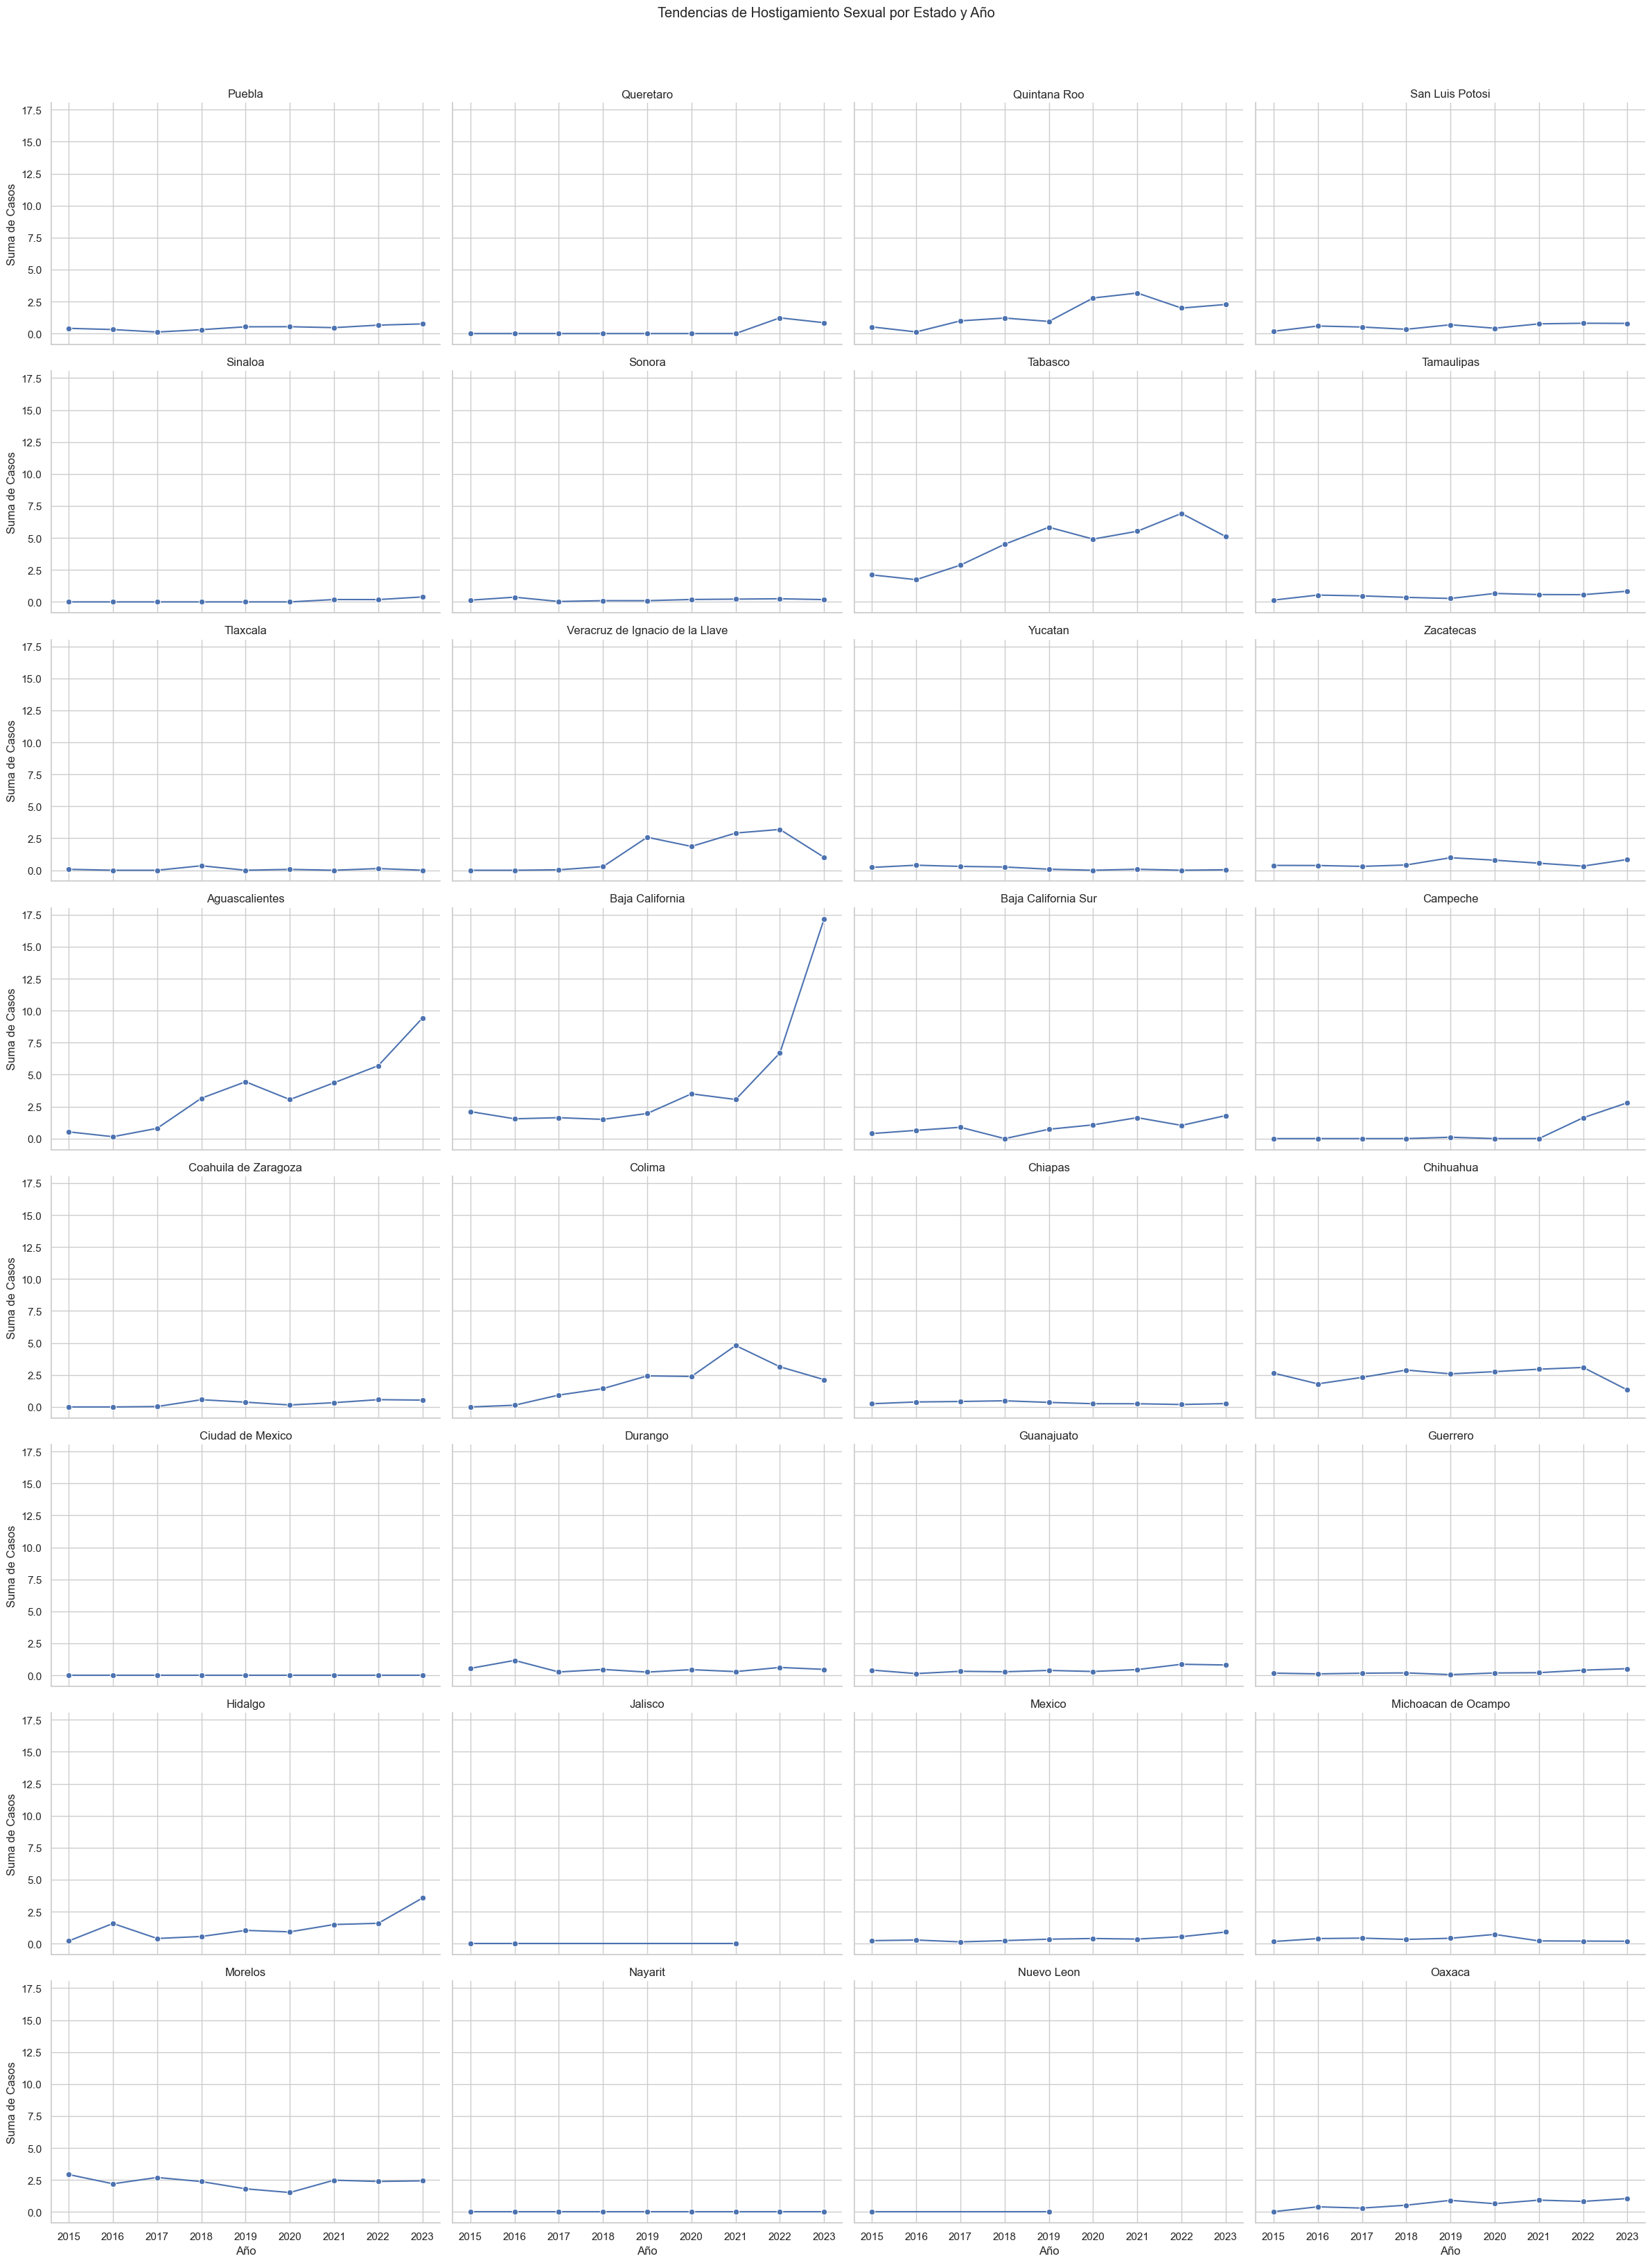

In [57]:

#df_filtrado = df_final_22Sep[df_final_22Sep['Tipo_de_abuso'].isin(['Acoso sexual', 'Abuso sexual'])]


df_hostigamiento_sexual_2 = df_final_22Sep[df_final_22Sep['Tipo_de_abuso'] == 'Hostigamiento sexual']

g = sns.FacetGrid(df_hostigamiento_sexual_2, col="Estado", col_wrap=4, height=4, aspect=1.5)


g.map(sns.lineplot, "A_o", "Cuenta_Normalizada_By_Poblacion_Estado", estimator=sum, errorbar=None, marker='o')


g.set_axis_labels("Año", "Suma de Casos")
g.set_titles("{col_name}")


g.fig.suptitle('Tendencias de Hostigamiento Sexual por Estado y Año', y=1.02)



plt.tight_layout()
plt.show()

In [60]:
df_final_22Sep.head()

,A_o,Estado,Tipo_de_abuso,Subtipo_de_Abuso,Mes,Cuenta,Cuenta_Normalizada,Poblacion,Cuenta_Normalizada_By_Poblacion_Estado
0,2015,Puebla,Acoso sexual,Acoso sexual,Enero,11,0.000092,5641396.0,0.194987
1,2015,Puebla,Hostigamiento sexual,Hostigamiento sexual,Enero,1,0.000008,5641396.0,0.017726
2,2015,Puebla,Violacion simple,Violacion simple,Enero,43,0.000360,5641396.0,0.762223
3,2015,Puebla,Violacion Equiparada,Violacion Equiparada,Enero,8,0.000067,5641396.0,0.141809
4,2015,Puebla,Otros delitos que atentan contra la libertad y...,Otros delitos que atentan contra la libertad y...,Enero,49,0.000410,5641396.0,0.868579


In [59]:
df_hostigamiento_sexual_2.head()

,A_o,Estado,Tipo_de_abuso,Subtipo_de_Abuso,Mes,Cuenta,Cuenta_Normalizada,Poblacion,Cuenta_Normalizada_By_Poblacion_Estado
1,2015,Puebla,Hostigamiento sexual,Hostigamiento sexual,Enero,1,0.000008,5641396.0,0.017726
7,2015,Queretaro,Hostigamiento sexual,Hostigamiento sexual,Enero,0,0.000000,1902207.0,0.000000
15,2015,Quintana Roo,Hostigamiento sexual,Hostigamiento sexual,Enero,0,0.000000,1757442.0,0.000000
16,2015,Quintana Roo,Hostigamiento sexual,Hostigamiento sexual,Enero,0,0.000000,1366492.0,0.000000
25,2015,San Luis Potosi,Hostigamiento sexual,Hostigamiento sexual,Enero,2,0.000017,2834271.0,0.070565
